In [1]:
"""Author Name: Olubayode Ebenezer
    email: olubayodeeben@yahoo.com""""

import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

import numpy.random as nr
import matplotlib.pyplot as plt

import scipy.stats as ss
import math



%matplotlib inline


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
train_data= pd.read_csv('train.csv') #, parse_dates=['Date_Customer'])
test_data= pd.read_csv('test.csv')#,parse_dates=['Date_Customer'])
ss = pd.read_csv("sample_submission_wBWLI0s.csv")
train_data.head(5)

row_id  scout_id  rating_num  winner   team  competitionId  \
0       1        13         7.0  winner  team1              8   
1       3        16         6.5   loser  team2              8   
2       4         4         8.5   loser  team1              5   
3       5        13         8.0   loser  team2              4   
4       7        11         3.5    draw  team1              5   

   player_position_1  player_position_2  player_height  player_weight  \
0                7.0                7.0       0.317073           0.48   
1                3.0                9.0       0.463415           0.42   
2               11.0               11.0       0.682927           0.44   
3               17.0               17.0       0.682927           0.58   
4               10.0               10.0       0.731707           0.70   

   player_general_var_0  player_general_var_1  player_general_var_2  \
0                   0.0                     0                   0.0   
1                   0.0                     0                   0.0   
2                   0.0                     0                   0.0   
3                   0.0                     0                   0.0   
4                   0.0                     0                   0.0   

   player_general_var_3  player_general_var_4  player_general_var_5  \
0                   0.0              0.114754                  0.00   
1                   0.0              0.081967                  0.00   
2                   0.0              0.065574                  0.25   
3                   0.0              0.000000                  0.00   
4                   0.0              0.262295                  0.25   

   player_positional_raw_var_0  player_positional_raw_var_1  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_positional_raw_var_2  player_positional_raw_var_3  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_defensive_raw_var_4  player_defensive_raw_var_5  \
0                      0.0000                         0.0   
1                      0.0625                         0.0   
2                      0.1875                         0.0   
3                      0.0000                         0.0   
4                      0.0000                         0.0   

   player_other_raw_var_6  player_offensive_raw_var_7  player_other_raw_var_8  \
0                0.467550                         0.0                     0.0   
1                0.436467                         0.0                     0.0   
2                0.631370                         0.0                     0.0   
3                0.467550                         0.0                     0.0   
4                0.467550                         0.4                     0.0   

   player_other_raw_var_9  player_other_raw_var_10  \
0                     0.0                      0.0   
1                     0.0                      0.0   
2                     0.0                      0.0   
3                     0.0                      0.0   
4                     0.0                      0.0   

   player_offensive_raw_var_11  player_other_raw_var_12  \
0                          0.0                      0.0   
1                          0.0                      0.0   
2                          0.0                      0.0   
3                          0.0                      0.0   
4                          0.0                      0.0   

   player_other_raw_var_13 

In [4]:
ss.head()

row_id  rating_num
0   14785           7
1   15125           7
2   13095           7
3    6079           7
4   16584           7

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20453 entries, 0 to 20452
Columns: 800 entries, row_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(4), object(2)
memory usage: 124.8+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8774 entries, 0 to 8773
Columns: 799 entries, row_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(3), object(2)
memory usage: 53.5+ MB


In [7]:
test_data.head()

row_id  scout_id  winner   team  competitionId  player_position_1  \
0   14785        16    draw  team1            7.0                4.0   
1   15125         2    draw  team1            9.0               11.0   
2   13095        16   loser  team2           10.0               19.0   
3    6079        16   loser  team1           11.0                3.0   
4   16584        11  winner  team1            5.0                4.0   

   player_position_2  player_height  player_weight  player_general_var_0  \
0                4.0       0.317073           0.44                   0.0   
1               11.0       0.560976           0.60                   0.0   
2               19.0       0.195122           0.30                   0.0   
3                9.0       0.341463           0.30                   0.0   
4                4.0       0.585366           0.70                   0.2   

   player_general_var_1  player_general_var_2  player_general_var_3  \
0                     0              0.803922                   0.0   
1                     0              0.000000                   0.0   
2                     0              0.000000                   0.0   
3                     0              0.000000                   0.0   
4                     0              0.000000                   0.0   

   player_general_var_4  player_general_var_5  player_positional_raw_var_0  \
0              0.114754                  0.00                     0.166667   
1              0.229508                  0.00                     0.000000   
2              0.049180                  0.25                     0.000000   
3              0.073770                  0.00                     0.000000   
4              0.106557                  0.00                     0.000000   

   player_positional_raw_var_1  player_positional_raw_var_2  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_positional_raw_var_3  player_defensive_raw_var_4  \
0                          0.0                      0.0625   
1                          0.0                      0.0625   
2                          0.0                      0.0000   
3                          0.0                      0.0000   
4                          0.0                      0.0000   

   player_defensive_raw_var_5  player_other_raw_var_6  \
0                         0.0                0.467550   
1                         0.0                0.287744   
2                         0.0                0.467550   
3                         0.0                0.467550   
4                         0.0                0.359680   

   player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  \
0                         0.0                     0.0                     0.0   
1                         0.0                     0.0                     0.0   
2                         0.2                     0.0                     0.0   
3                         0.0                     0.0                     0.0   
4                         0.0                     0.0                     0.0   

   player_other_raw_var_10  player_offensive_raw_var_11  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
4                      0.0                          0.0   

   player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0              

In [8]:
train_data.dtypes

row_id                                 int64
scout_id                               int64
rating_num                           float64
winner                                object
team                                  object
competitionId                          int64
player_position_1                    float64
player_position_2                    float64
player_height                        float64
player_weight                        float64
player_general_var_0                 float64
player_general_var_1                   int64
player_general_var_2                 float64
player_general_var_3                 float64
player_general_var_4                 float64
player_general_var_5                 float64
player_positional_raw_var_0          float64
player_positional_raw_var_1          float64
player_positional_raw_var_2          float64
player_positional_raw_var_3          float64
player_defensive_raw_var_4           float64
player_defensive_raw_var_5           float64
player_oth

### Remove Duplicates if present

In [9]:
train_data.drop_duplicates(subset='row_id', keep = 'first', inplace = True)

In [10]:
train_data.loc[train_data.duplicated(), :]

Empty DataFrame
Columns: [row_id, scout_id, rating_num, winner, team, competitionId, player_position_1, player_position_2, player_height, player_weight, player_general_var_0, player_general_var_1, player_general_var_2, player_general_var_3, player_general_var_4, player_general_var_5, player_positional_raw_var_0, player_positional_raw_var_1, player_positional_raw_var_2, player_positional_raw_var_3, player_defensive_raw_var_4, player_defensive_raw_var_5, player_other_raw_var_6, player_offensive_raw_var_7, player_other_raw_var_8, player_other_raw_var_9, player_other_raw_var_10, player_offensive_raw_var_11, player_other_raw_var_12, player_other_raw_var_13, player_other_raw_var_14, player_positional_raw_var_15, player_positional_raw_var_16, player_positional_raw_var_17, player_other_raw_var_18, player_other_raw_var_19, player_other_raw_var_20, player_positional_raw_var_21, player_positional_raw_var_22, player_positional_raw_var_23, player_other_raw_var_24, player_other_raw_var_25, player_other_raw_var_26, player_other_raw_var_27, player_other_raw_var_28, player_other_raw_var_29, player_other_raw_var_30, player_offensive_raw_var_31, player_offensive_raw_var_32, player_other_raw_var_33, player_other_raw_var_34, player_other_raw_var_35, player_other_raw_var_36, player_other_raw_var_37, player_other_raw_var_38, player_other_raw_var_39, player_other_raw_var_40, player_other_raw_var_41, player_defensive_raw_var_42, player_defensive_raw_var_43, player_other_raw_var_44, player_other_raw_var_45, player_offensive_raw_var_46, player_other_raw_var_47, player_defensive_raw_var_48, player_offensive_raw_var_49, player_offensive_raw_var_50, player_other_raw_var_51, player_defensive_raw_var_52, player_offensive_raw_var_53, player_other_raw_var_54, player_positional_raw_var_55, player_other_raw_var_56, player_other_raw_var_57, player_other_raw_var_58, player_other_raw_var_59, player_offensive_raw_var_60, player_defensive_raw_var_61, player_defensive_raw_var_62, player_other_raw_var_63, player_other_raw_var_64, player_defensive_raw_var_65, player_defensive_raw_var_66, player_defensive_raw_var_67, player_other_raw_var_68, player_other_raw_var_69, player_defensive_raw_var_70, player_general_raw_var_71, player_general_raw_var_72, player_offensive_raw_var_73, player_defensive_raw_var_74, player_other_raw_var_75, player_other_raw_var_76, player_offensive_raw_var_77, player_general_raw_var_78, player_offensive_raw_var_79, player_other_raw_var_80, player_other_raw_var_81, player_other_raw_var_82, player_other_raw_var_83, ...]
Index: []

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20453 entries, 0 to 20452
Columns: 800 entries, row_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(4), object(2)
memory usage: 125.0+ MB


In [12]:
test_data.drop_duplicates(subset='row_id', keep = 'first', inplace = True)

In [13]:
test_data.loc[train_data.duplicated(), :]

Empty DataFrame
Columns: [row_id, scout_id, winner, team, competitionId, player_position_1, player_position_2, player_height, player_weight, player_general_var_0, player_general_var_1, player_general_var_2, player_general_var_3, player_general_var_4, player_general_var_5, player_positional_raw_var_0, player_positional_raw_var_1, player_positional_raw_var_2, player_positional_raw_var_3, player_defensive_raw_var_4, player_defensive_raw_var_5, player_other_raw_var_6, player_offensive_raw_var_7, player_other_raw_var_8, player_other_raw_var_9, player_other_raw_var_10, player_offensive_raw_var_11, player_other_raw_var_12, player_other_raw_var_13, player_other_raw_var_14, player_positional_raw_var_15, player_positional_raw_var_16, player_positional_raw_var_17, player_other_raw_var_18, player_other_raw_var_19, player_other_raw_var_20, player_positional_raw_var_21, player_positional_raw_var_22, player_positional_raw_var_23, player_other_raw_var_24, player_other_raw_var_25, player_other_raw_var_26, player_other_raw_var_27, player_other_raw_var_28, player_other_raw_var_29, player_other_raw_var_30, player_offensive_raw_var_31, player_offensive_raw_var_32, player_other_raw_var_33, player_other_raw_var_34, player_other_raw_var_35, player_other_raw_var_36, player_other_raw_var_37, player_other_raw_var_38, player_other_raw_var_39, player_other_raw_var_40, player_other_raw_var_41, player_defensive_raw_var_42, player_defensive_raw_var_43, player_other_raw_var_44, player_other_raw_var_45, player_offensive_raw_var_46, player_other_raw_var_47, player_defensive_raw_var_48, player_offensive_raw_var_49, player_offensive_raw_var_50, player_other_raw_var_51, player_defensive_raw_var_52, player_offensive_raw_var_53, player_other_raw_var_54, player_positional_raw_var_55, player_other_raw_var_56, player_other_raw_var_57, player_other_raw_var_58, player_other_raw_var_59, player_offensive_raw_var_60, player_defensive_raw_var_61, player_defensive_raw_var_62, player_other_raw_var_63, player_other_raw_var_64, player_defensive_raw_var_65, player_defensive_raw_var_66, player_defensive_raw_var_67, player_other_raw_var_68, player_other_raw_var_69, player_defensive_raw_var_70, player_general_raw_var_71, player_general_raw_var_72, player_offensive_raw_var_73, player_defensive_raw_var_74, player_other_raw_var_75, player_other_raw_var_76, player_offensive_raw_var_77, player_general_raw_var_78, player_offensive_raw_var_79, player_other_raw_var_80, player_other_raw_var_81, player_other_raw_var_82, player_other_raw_var_83, player_other_raw_var_84, ...]
Index: []

In [14]:
test_data.head()

row_id  scout_id  winner   team  competitionId  player_position_1  \
0   14785        16    draw  team1            7.0                4.0   
1   15125         2    draw  team1            9.0               11.0   
2   13095        16   loser  team2           10.0               19.0   
3    6079        16   loser  team1           11.0                3.0   
4   16584        11  winner  team1            5.0                4.0   

   player_position_2  player_height  player_weight  player_general_var_0  \
0                4.0       0.317073           0.44                   0.0   
1               11.0       0.560976           0.60                   0.0   
2               19.0       0.195122           0.30                   0.0   
3                9.0       0.341463           0.30                   0.0   
4                4.0       0.585366           0.70                   0.2   

   player_general_var_1  player_general_var_2  player_general_var_3  \
0                     0              0.803922                   0.0   
1                     0              0.000000                   0.0   
2                     0              0.000000                   0.0   
3                     0              0.000000                   0.0   
4                     0              0.000000                   0.0   

   player_general_var_4  player_general_var_5  player_positional_raw_var_0  \
0              0.114754                  0.00                     0.166667   
1              0.229508                  0.00                     0.000000   
2              0.049180                  0.25                     0.000000   
3              0.073770                  0.00                     0.000000   
4              0.106557                  0.00                     0.000000   

   player_positional_raw_var_1  player_positional_raw_var_2  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_positional_raw_var_3  player_defensive_raw_var_4  \
0                          0.0                      0.0625   
1                          0.0                      0.0625   
2                          0.0                      0.0000   
3                          0.0                      0.0000   
4                          0.0                      0.0000   

   player_defensive_raw_var_5  player_other_raw_var_6  \
0                         0.0                0.467550   
1                         0.0                0.287744   
2                         0.0                0.467550   
3                         0.0                0.467550   
4                         0.0                0.359680   

   player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  \
0                         0.0                     0.0                     0.0   
1                         0.0                     0.0                     0.0   
2                         0.2                     0.0                     0.0   
3                         0.0                     0.0                     0.0   
4                         0.0                     0.0                     0.0   

   player_other_raw_var_10  player_offensive_raw_var_11  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
4                      0.0                          0.0   

   player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0              

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8774 entries, 0 to 8773
Columns: 799 entries, row_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(3), object(2)
memory usage: 53.6+ MB


No Duplicate is present in both train and test datasets

In [16]:
train_data['winner'].unique()

array(['winner', 'loser', 'draw'], dtype=object)

In [17]:
train_data['team'].unique()

array(['team1', 'team2'], dtype=object)

In [18]:
train_data['rating_num'].value_counts()

6.0     3654
6.5     3247
7.5     3206
10.0    2442
5.0     2244
7.0     1248
3.5     1077
8.5     1062
9.0     1023
8.0      873
0.0      218
3.0      110
2.0       49
Name: rating_num, dtype: int64

In [19]:
player_r2 = len(train_data[train_data["rating_num"] == 2.0])
player_r3 = len(train_data[train_data["rating_num"] == 3.0])
player_r0 = len(train_data[train_data["rating_num"] == 0.0])
player_r8 = len(train_data[train_data["rating_num"] == 8.0])
player_r9 = len(train_data[train_data["rating_num"] == 9.0])
player_r8_5 = len(train_data[train_data["rating_num"] == 8.5])
player_r3_5 = len(train_data[train_data["rating_num"] == 3.5])
player_r7 = len(train_data[train_data["rating_num"] == 7.0])
player_r5 = len(train_data[train_data["rating_num"] == 5.0])
player_r10 = len(train_data[train_data["rating_num"] == 10.0])
player_r7_5 = len(train_data[train_data["rating_num"] == 7.5])
player_r6_5 = len(train_data[train_data["rating_num"] == 6.5])
player_r6 = len(train_data[train_data["rating_num"] == 6.0])
total_rating_num = player_r2 + player_r3 + player_r0 + player_r8 + player_r9 + player_r8_5 + player_r3_5 + player_r7 + player_r5 + player_r10 + player_r7_5 + player_r6_5 + player_r6
print(f'The number of players with rating 2 is {player_r2}')
print(f'The number of players with rating 3 is {player_r3}')
print(f'The number of players with rating 0 is {player_r0}')
print(f'The number of players with rating 8 is {player_r8}')
print(f'The number of players with rating 9 is {player_r9}')
print(f'The number of players with rating 8.5 is {player_r8_5}')
print(f'The number of players with rating 3.5 is {player_r3_5}')
print(f'The number of players with rating 7 is {player_r7}')
print(f'The number of players with rating 5 is {player_r5}')
print(f'The number of players with rating 10 is {player_r10}')
print(f'The number of players with rating 7.5 is {player_r7_5}')
print(f'The number of players with rating 6.5 is {player_r6_5}')
print(f'The number of players with rating 6 is {player_r6}')
print(f'The  total number of players with ratings is {total_rating_num }')


The number of players with rating 2 is 49
The number of players with rating 3 is 110
The number of players with rating 0 is 218
The number of players with rating 8 is 873
The number of players with rating 9 is 1023
The number of players with rating 8.5 is 1062
The number of players with rating 3.5 is 1077
The number of players with rating 7 is 1248
The number of players with rating 5 is 2244
The number of players with rating 10 is 2442
The number of players with rating 7.5 is 3206
The number of players with rating 6.5 is 3247
The number of players with rating 6 is 3654
The  total number of players with ratings is 20453


The  players with rating number 6 has the highest population of players of  3654  whilw the least is rating number 2 having 49 

In [20]:
#calculating percentage
p_r2= ( player_r2/ total_rating_num) * 100
p_r3= ( player_r3/ total_rating_num) * 100
p_r0= ( player_r0/ total_rating_num) * 100
p_r8= ( player_r8/ total_rating_num) * 100
p_r9= ( player_r9/ total_rating_num) * 100
p_r8_5= ( player_r8_5/ total_rating_num) * 100
p_r3_5= ( player_r3_5/ total_rating_num) * 100
p_r7= ( player_r7/ total_rating_num) * 100
p_r5= ( player_r5/ total_rating_num) * 100
p_r10= ( player_r10/ total_rating_num) * 100
p_r7_5= ( player_r7_5/ total_rating_num) * 100
p_r6_5= ( player_r6_5/ total_rating_num) * 100
p_r6= ( player_r6/ total_rating_num) * 100

print('The percentage of players with rating number 2 is {}'.format(p_r2))
print('The percentage of players with rating number 3  is {}'.format(p_r3))
print('The percentage of players with rating number 0  is {}'.format(p_r0))
print('The percentage of players with rating number 8  is {}'.format(p_r8))
print('The percentage of players with rating number 9 is {}'.format(p_r9))
print('The percentage of players with rating number 8.5  is {}'.format(p_r8_5))
print('The percentage of players with rating number 3.5  is {}'.format(p_r3_5))
print('The percentage of players with rating number 7  is {}'.format(p_r7))
print('The percentage of players with rating number 5  is {}'.format(p_r5))
print('The percentage of players with rating number 10  is {}'.format(p_r10))
print('The percentage of players with rating number 7.5 is {}'.format(p_r7_5))
print('The percentage of players with rating number 6.5  is {}'.format(p_r6_5))
print('The percentage of players with rating number 6  is {}'.format(p_r6))


The percentage of players with rating number 2 is 0.2395736566762822
The percentage of players with rating number 3  is 0.537818412946756
The percentage of players with rating number 0  is 1.06585830929448
The percentage of players with rating number 8  is 4.268322495477436
The percentage of players with rating number 9 is 5.0017112404048305
The percentage of players with rating number 8.5  is 5.192392314085953
The percentage of players with rating number 3.5  is 5.265731188578693
The percentage of players with rating number 7  is 6.101794357795922
The percentage of players with rating number 5  is 10.971495624113823
The percentage of players with rating number 10  is 11.939568767417983
The percentage of players with rating number 7.5 is 15.674962108248177
The percentage of players with rating number 6.5  is 15.875421698528333
The percentage of players with rating number 6  is 17.86534982643133


In [21]:
import scipy.stats as stats
# Calculating mean and Stdev of AGW
train_data_mean = np.mean(train_data["rating_num"])
train_data_std = np.std(train_data["rating_num"])
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(train_data["rating_num"].sort_values(), train_data_mean, train_data_std)

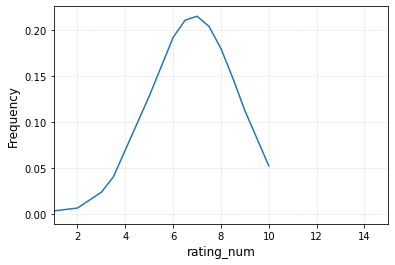

In [22]:
# Drawing a graph
plt.plot(train_data["rating_num"].sort_values(), pdf)
plt.xlim([1,15])  
plt.xlabel("rating_num", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()


<AxesSubplot:xlabel='rating_num', ylabel='Density'>

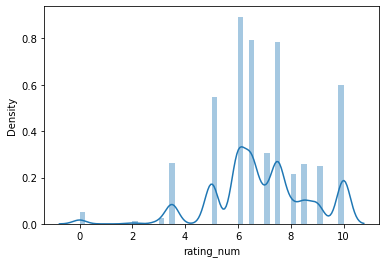

In [23]:
sns.distplot(train_data["rating_num"])

The highest 'Rating Number' i.e rating_num is 6 with 17.86534982643133 percentage

The train data is not uniformly distributed.


In [24]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)


In [25]:
quality_report(train_data)

Total NaN  Percent of NaN  Nunique    Dtype
team2_other_raw_var_19                 20453      100.000000        0  float64
team1_other_raw_var_50                 20453      100.000000        0  float64
team1_other_raw_var_72                 20453      100.000000        0  float64
team1_other_raw_var_19                 20453      100.000000        0  float64
team1_other_raw_var_31                 20453      100.000000        0  float64
team1_other_raw_var_33                 20453      100.000000        0  float64
team1_other_raw_var_92                 20453      100.000000        0  float64
team1_other_raw_var_82                 20453      100.000000        0  float64
team2_other_raw_var_72                 20453      100.000000        0  float64
team1_other_raw_var_38                 20453      100.000000        0  float64
team1_other_raw_var_40                 20453      100.000000        0  float64
team1_other_raw_var_43                 20453      100.000000        0  float64
team2_other_raw_var_92                 20453      100.000000        0  float64
team1_other_ratio_var_33               20453      100.000000        0  float64
team1_other_ratio_var_32               20453      100.000000        0  float64
team2_other_raw_var_82                 20453      100.000000        0  float64
team2_other_raw_var_51                 20453      100.000000        0  float64
team2_other_raw_var_50                 20453      100.000000        0  float64
team2_other_raw_var_31                 20453      100.000000        0  float64
team1_other_raw_var_51                 20453      100.000000        0  float64
team2_other_ratio_var_32               20453      100.000000        0  float64
team2_other_raw_var_33                 20453      100.000000        0  float64
team2_other_ratio_var_33               20453      100.000000        0  float64
team2_other_raw_var_38                 20453      100.000000        0  float64
team2_other_raw_var_40                 20453      100.000000        0  float64
team2_other_raw_var_43                 20453      100.000000        0  float64
player_other_ratio_var_26              20323       99.364396        3  float64
player_other_ratio_var_27              20302       99.261722        4  float64
player_other_ratio_var_24              20256       99.036816        3  float64
player_other_ratio_var_28              20045       98.005183        5  float64
player_other_ratio_var_25              20024       97.902508        6  float64
player_other_ratio_var_23              19928       97.433139        4  float64
player_positional_ratio_var_79         19863       97.115338        5  float64
player_other_ratio_var_37              19694       96.289053       13  float64
player_defensive_ratio_var_38          19694       96.289053        8  float64
player_defensive_ratio_var_39          19694       96.289053       12  float64
player_offensive_ratio_var_70          19656       96.103261       27  float64
player_offensive_ratio_var_68          19482       95.252530        7  float64
player_offensive_ratio_var_69          19422       94.959175       11  float64
player_other_ratio_var_67              19295       94.338239       18  float64
player_other_ratio_var_73              19179       93.771085       73  float64
player_offensive_ratio_var_77          18950       92.651445        7  float64
player_other_ratio_var_36              18644       91.155332        6  float64
player_defensive_ratio_var_16          18017       88.089767        9  float64
player_other_ratio_var_14              17975       87.884418        9  float64
player_other_ratio_var_32              17803       87.043466        5  float64
player_other_ratio_var_34              17803       87.043466        5  float64
player_other_ratio_var_33              17803       87.043466        6  float64
player_offensive_ratio_var_72          17691       86.495869        7  float64
player_positional_ratio_var_22         16721       81.753288       38  float64
player

Looks like all variables present are numbers, whereas "winner" and "team" are strings (possibly categories). some of the columns contain some missing values, which doesn't saves us a fair bit of work!


Here are some statistics for the numerical columns:

In [26]:
train_data.describe()

row_id      scout_id    rating_num  competitionId  \
count  20453.000000  20453.000000  20453.000000   20453.000000   
mean   14257.557033     10.023566      6.887303       7.311837   
std     8353.543104      5.712044      1.852367       2.345699   
min        1.000000      1.000000      0.000000       4.000000   
25%     7048.000000      3.000000      6.000000       5.000000   
50%    14093.000000     12.000000      6.500000       7.000000   
75%    21381.000000     15.000000      8.000000       9.000000   
max    29227.000000     26.000000     10.000000      15.000000   

       player_position_1  player_position_2  player_height  player_weight  \
count       20378.000000       20378.000000   20451.000000   20451.000000   
mean            7.609481           8.012612       0.496925       0.455471   
std             5.059591           4.913142       0.160769       0.140848   
min             1.000000           1.000000       0.024390       0.040000   
25%             3.000000           3.000000       0.390244       0.340000   
50%             7.000000           8.000000       0.512195       0.440000   
75%            11.000000          11.000000       0.609756       0.540000   
max            23.000000          23.000000       0.975610       1.000000   

       player_general_var_0  player_general_var_1  player_general_var_2  \
count          20453.000000          20453.000000          20453.000000   
mean               0.029717              0.003276              0.088648   
std                0.082089              0.057142              0.225635   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0.000000              0.000000   
75%                0.000000              0.000000              0.000000   
max                1.000000              1.000000              0.980392   

       player_general_var_3  player_general_var_4  player_general_var_5  \
count          20453.000000          20453.000000          20453.000000   
mean               0.004456              0.139540              0.017870   
std                0.056593              0.131500              0.068768   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.049180              0.000000   
50%                0.000000              0.114754              0.000000   
75%                0.000000              0.188525              0.000000   
max                0.990099              0.803279              0.750000   

       player_positional_raw_var_0  player_positional_raw_var_1  \
count                 20069.000000                 20069.000000   
mean                      0.016452                     0.009430   
std                       0.058252                     0.050116   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.000000                     0.000000   
max                       1.000000                     1.000000   

       player_positional_raw_var_2  player_positional_raw_var_3  \
count                 20069.000000                 20069.000000   
mean                      0.037172                     0.016958   
std                       0.095970                     0.077223   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.000000                     0.000000   
max                       0.800000                     1.000000   

       player_defensive_raw_var_4  player_defensive_raw_var_5  \
count                20069.000000                20069.000000   
mean                     0.054229 

The ranges of values in the numerical columns seem too reasonable, so we may have to do little or no much data cleaning or correction. The "rating_num" column seems to be significantly skewed.

Lets visualize those columns with missing values 

<AxesSubplot:>

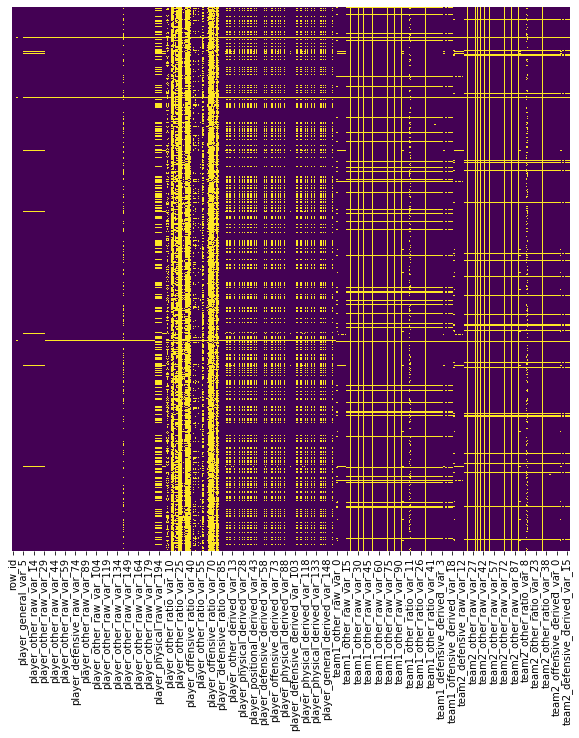

In [27]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=ax)


Lets check out the test_data out as well

In [28]:
# quality_report(test_data)

<AxesSubplot:>

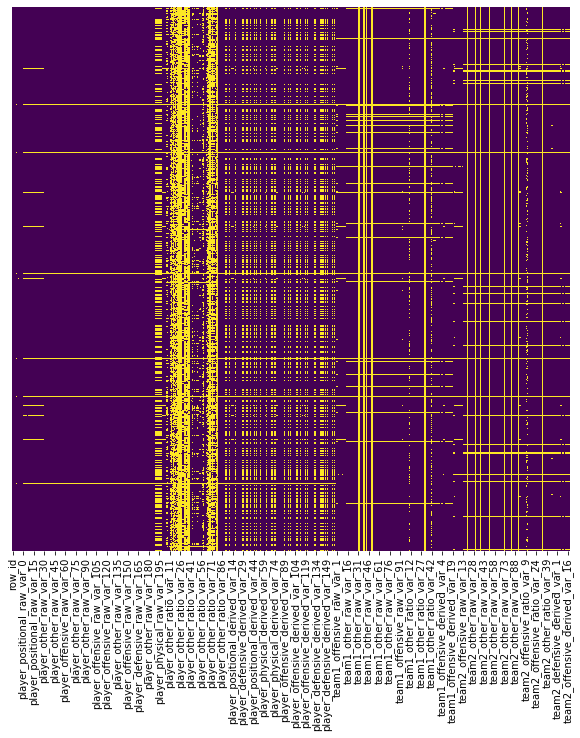

In [29]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=ax)


In [30]:
test_data['scout_id'].unique()

array([16,  2, 11, 15, 21,  1, 13,  3,  5,  4, 17, 12, 18, 10, 14, 26, 19,
       25, 20], dtype=int64)

In [31]:
train_data['scout_id'].unique()

array([13, 16,  4, 11, 15,  3,  2, 10, 19,  5, 14,  1, 12, 18, 26, 17, 21,
       20, 25, 22,  8], dtype=int64)

In [32]:
train_data['competitionId'].unique()

array([ 8,  5,  4,  7,  9, 10,  6, 11, 14, 15], dtype=int64)

In [33]:
test_data['competitionId'].unique()

array([ 7.,  9., 10., 11.,  5.,  6.,  4.,  8., 15., 14., nan])

In [34]:
test_data['competitionId']=test_data.competitionId.fillna(test_data.competitionId.median())

In [35]:
test_data['team2_system_id'].unique()

array([ 6.,  7., 10., 21.,  8., 12., 14.,  5., 22., 19., 18., 15., nan,
       17.,  9., 13., 27., 11., 20., 23., 28.,  4., 26.])

In [36]:
test_data['team2_system_id']=test_data.team2_system_id.fillna(test_data.team2_system_id.median())

In [37]:
train_data['team2_system_id'].unique()

array([10., 17.,  6.,  8., 18., 26., 12., 27., nan,  7., 14.,  9., 20.,
       21., 13.,  5.,  4., 19., 15., 11., 23., 22., 28.])

In [38]:
train_data['team2_system_id']=train_data.team2_system_id.fillna(train_data.team2_system_id.median())

In [39]:
train_data['team2_system_id'].unique()

array([10., 17.,  6.,  8., 18., 26., 12., 27.,  7., 14.,  9., 20., 21.,
       13.,  5.,  4., 19., 15., 11., 23., 22., 28.])

In [40]:
train_data['team1_system_id'].unique()

array([ 6.,  8., 12., nan, 10., 21., 11., 17., 26., 19., 14., 15.,  7.,
       18.,  9., 13., 20.,  4., 27., 22., 28.,  5., 23., 25.])

In [41]:
train_data['team1_system_id']=train_data.team1_system_id.fillna(train_data.team1_system_id.median())

In [42]:
test_data['team1_system_id'].unique()

array([ 6., 18., 10., 19.,  8., 21., 12., 26., nan,  9., 15.,  7., 17.,
       27., 14., 22., 11., 20., 13.,  4.,  5., 28., 23.])

In [43]:
test_data['team1_system_id']=test_data.team1_system_id.fillna(test_data.team1_system_id.median())

In [44]:
test_data['team1_system_id'].unique()

array([ 6., 18., 10., 19.,  8., 21., 12., 26.,  9., 15.,  7., 17., 27.,
       14., 22., 11., 20., 13.,  4.,  5., 28., 23.])

<AxesSubplot:>

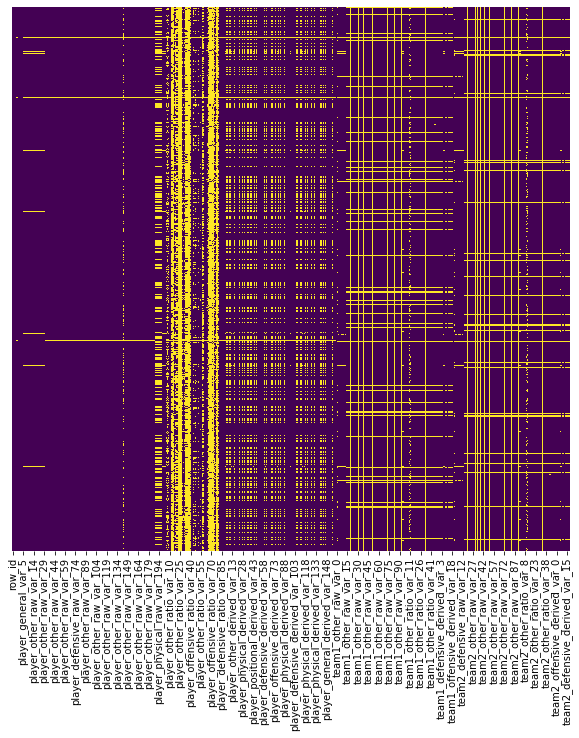

In [45]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=ax)


In [46]:
# test_data = test_data.loc[:, test_data.isnull().mean() < .23]

In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8774 entries, 0 to 8773
Columns: 799 entries, row_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(3), object(2)
memory usage: 53.6+ MB


<AxesSubplot:>

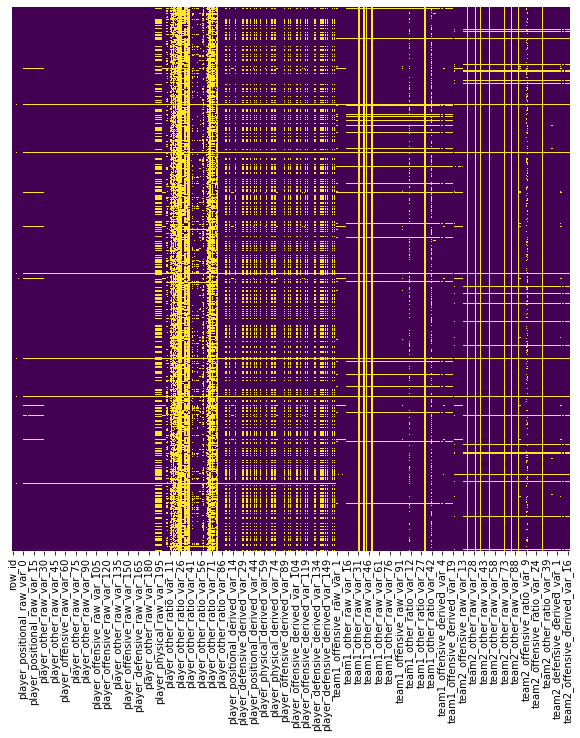

In [48]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=ax)


In [49]:
# test_data = test_data.loc[:, test_data.isnull().mean() < .06]

<AxesSubplot:xlabel='winner', ylabel='player_weight'>

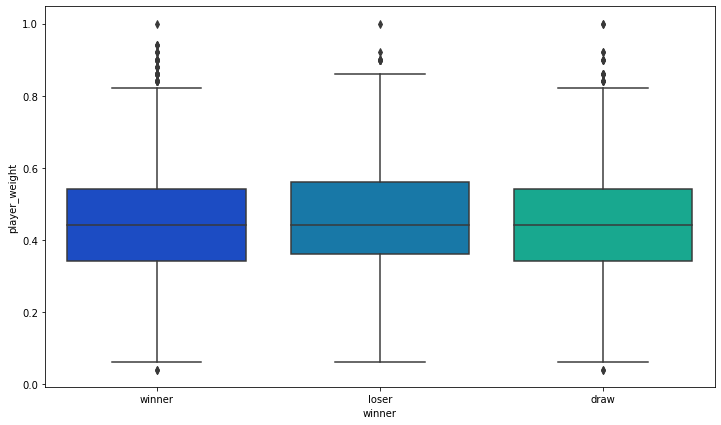

In [50]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='winner',y='player_weight',data=train_data, palette= 'winter')

Checking outliers in player weight

In [51]:
train_data.groupby(['winner'])['player_weight'].mean()

winner
draw      0.452588
loser     0.459826
winner    0.454001
Name: player_weight, dtype: float64

<AxesSubplot:xlabel='player_weight'>

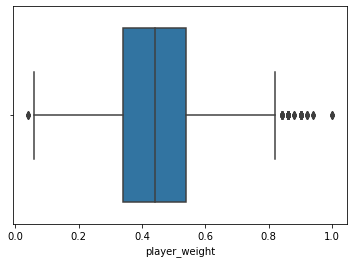

In [52]:
sns.boxplot(train_data['player_weight'])

In [53]:
# train_data.loc[train_data['player_weight'] > 0.9]

In [54]:
train_data.shape

(20453, 800)

In [55]:
test_data.shape

(8774, 799)

In [56]:
train_data.columns

Index(['row_id', 'scout_id', 'rating_num', 'winner', 'team', 'competitionId',
       'player_position_1', 'player_position_2', 'player_height',
       'player_weight',
       ...
       'team2_defensive_derived_var_10', 'team2_offensive_derived_var_11',
       'team2_offensive_derived_var_12', 'team2_offensive_derived_var_13',
       'team2_offensive_derived_var_14', 'team2_defensive_derived_var_15',
       'team2_offensive_derived_var_16', 'team2_defensive_derived_var_17',
       'team2_offensive_derived_var_18', 'team2_offensive_derived_var_19'],
      dtype='object', length=800)

In [57]:
test_data.shape

(8774, 799)

In [58]:
test_data.columns

Index(['row_id', 'scout_id', 'winner', 'team', 'competitionId',
       'player_position_1', 'player_position_2', 'player_height',
       'player_weight', 'player_general_var_0',
       ...
       'team2_defensive_derived_var_10', 'team2_offensive_derived_var_11',
       'team2_offensive_derived_var_12', 'team2_offensive_derived_var_13',
       'team2_offensive_derived_var_14', 'team2_defensive_derived_var_15',
       'team2_offensive_derived_var_16', 'team2_defensive_derived_var_17',
       'team2_offensive_derived_var_18', 'team2_offensive_derived_var_19'],
      dtype='object', length=799)

In [59]:
test_data['rating_num'] = 'test'

In [60]:
test_data.columns

Index(['row_id', 'scout_id', 'winner', 'team', 'competitionId',
       'player_position_1', 'player_position_2', 'player_height',
       'player_weight', 'player_general_var_0',
       ...
       'team2_offensive_derived_var_11', 'team2_offensive_derived_var_12',
       'team2_offensive_derived_var_13', 'team2_offensive_derived_var_14',
       'team2_defensive_derived_var_15', 'team2_offensive_derived_var_16',
       'team2_defensive_derived_var_17', 'team2_offensive_derived_var_18',
       'team2_offensive_derived_var_19', 'rating_num'],
      dtype='object', length=800)

## Combining both test and train data 

In [61]:
data = pd.concat([train_data, test_data]).reset_index(drop = True)

In [62]:
data = data.drop(['row_id'], axis = 1)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29227 entries, 0 to 29226
Columns: 799 entries, scout_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(2), object(3)
memory usage: 178.2+ MB


In [64]:
data.shape

(29227, 799)

In [65]:
data['winner'].unique()

array(['winner', 'loser', 'draw'], dtype=object)

In [66]:
data['team'].unique()

array(['team1', 'team2', nan], dtype=object)

In [67]:
data.head()

scout_id rating_num  winner   team  competitionId  player_position_1  \
0        13        7.0  winner  team1            8.0                7.0   
1        16        6.5   loser  team2            8.0                3.0   
2         4        8.5   loser  team1            5.0               11.0   
3        13        8.0   loser  team2            4.0               17.0   
4        11        3.5    draw  team1            5.0               10.0   

   player_position_2  player_height  player_weight  player_general_var_0  \
0                7.0       0.317073           0.48                   0.0   
1                9.0       0.463415           0.42                   0.0   
2               11.0       0.682927           0.44                   0.0   
3               17.0       0.682927           0.58                   0.0   
4               10.0       0.731707           0.70                   0.0   

   player_general_var_1  player_general_var_2  player_general_var_3  \
0                     0                   0.0                   0.0   
1                     0                   0.0                   0.0   
2                     0                   0.0                   0.0   
3                     0                   0.0                   0.0   
4                     0                   0.0                   0.0   

   player_general_var_4  player_general_var_5  player_positional_raw_var_0  \
0              0.114754                  0.00                          0.0   
1              0.081967                  0.00                          0.0   
2              0.065574                  0.25                          0.0   
3              0.000000                  0.00                          0.0   
4              0.262295                  0.25                          0.0   

   player_positional_raw_var_1  player_positional_raw_var_2  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_positional_raw_var_3  player_defensive_raw_var_4  \
0                          0.0                      0.0000   
1                          0.0                      0.0625   
2                          0.0                      0.1875   
3                          0.0                      0.0000   
4                          0.0                      0.0000   

   player_defensive_raw_var_5  player_other_raw_var_6  \
0                         0.0                0.467550   
1                         0.0                0.436467   
2                         0.0                0.631370   
3                         0.0                0.467550   
4                         0.0                0.467550   

   player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  \
0                         0.0                     0.0                     0.0   
1                         0.0                     0.0                     0.0   
2                         0.0                     0.0                     0.0   
3                         0.0                     0.0                     0.0   
4                         0.4                     0.0                     0.0   

   player_other_raw_var_10  player_offensive_raw_var_11  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
4                      0.0                          0.0   

   player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                     

### REMOVE OUTLIERS FROM THE NUMERICAL COLUMNS

In [68]:
def remove_outliers(data):
    for col in data:
        high = data[col].mean() + 3*data[col].std()
        low = data[col].mean() - 3*data[col].std()
        data[col] = np.where(
            data[col] > high,
            high,
            np.where(
                data[col] < low,
                low,
                data[col]))
remove_outliers(data.drop(['rating_num','winner','team'], axis =1))

In [69]:
data.shape

(29227, 799)

### Dropping certain percentage of zeros values in each of the datframe colum

In [70]:
def drop_almost_zero(df, percentage):
    row_cut_off = int(percentage/100*len(df.columns))
    df = df[(df==0).sum(axis='columns') <= row_cut_off]

    column_cut_off = int(percentage/100*len(df)) 
    b = (df == 0).sum(axis='rows')
    df = df[ b[ b <= column_cut_off].index.values ]

    return df
# data_ = drop_almost_zero(data, 30)
data_= drop_almost_zero(data, 90)

In [71]:
data_.shape

(29227, 694)

In [72]:
data.shape

(29227, 799)

In [73]:
# data['winner']

In [74]:
# data = data.loc[:, data.isnull().mean() < .02]
# data.shape

# Convert Categorical columns to numerical

In [75]:
# Replace winner,draw, loser with 1,0,-1 in winner column
# Replace team1 with 1 and team2 with zero in team column.

data_['team'] = np.where(data_['team']!= 'team1', 1, 0)
data_['winner'] = np.where(data_['winner']== 'winner', 1, np.where(data['winner']== 'loser', -1,0 ))



# x_test['team'] = np.where(x_test['team']!= 'team1', 1, 0)
# x_test['winner'] = np.where(x_test['winner']== 'winner', 1, np.where(x_test['winner']== 'loser', -1,0 ))

In [76]:
data_['team'].unique()

array([0, 1])

In [77]:
data_['winner'].unique()

array([ 1, -1,  0])

## CHECKING THE CORRELATION

In [78]:
# corr = data_.corr()
# display(corr)

In [79]:
data_.dtypes

scout_id                               int64
rating_num                            object
winner                                 int32
team                                   int32
competitionId                        float64
player_position_1                    float64
player_position_2                    float64
player_height                        float64
player_weight                        float64
player_general_var_0                 float64
player_general_var_2                 float64
player_general_var_4                 float64
player_positional_raw_var_0          float64
player_positional_raw_var_2          float64
player_defensive_raw_var_4           float64
player_defensive_raw_var_5           float64
player_other_raw_var_6               float64
player_offensive_raw_var_7           float64
player_positional_raw_var_15         float64
player_other_raw_var_18              float64
player_other_raw_var_20              float64
player_offensive_raw_var_31          float64
player_off

In [80]:
cateogry_columns=data_.select_dtypes(include=['object']).columns.tolist()
integer_columns=data_.select_dtypes(include=['int64','float64']).columns.tolist()
len(cateogry_columns),len(integer_columns)

(1, 691)

In [81]:
# quality_report(data)

In [82]:
# Replace the NUll values with mean
data_ = data_.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna(x.mode()))

In [83]:
# quality_report(data_)

In [84]:
# data_.isnull().sum()

In [85]:
remove_outliers(data_.drop('rating_num', axis =1))

In [86]:
data_.isnull().sum()

scout_id                                 0
rating_num                               0
winner                                   0
team                                     0
competitionId                            0
player_position_1                        0
player_position_2                        0
player_height                            0
player_weight                            0
player_general_var_0                     0
player_general_var_2                     0
player_general_var_4                     0
player_positional_raw_var_0              0
player_positional_raw_var_2              0
player_defensive_raw_var_4               0
player_defensive_raw_var_5               0
player_other_raw_var_6                   0
player_offensive_raw_var_7               0
player_positional_raw_var_15             0
player_other_raw_var_18                  0
player_other_raw_var_20                  0
player_offensive_raw_var_31              0
player_offensive_raw_var_32              0
player_othe

In [87]:
# team2_other_ratio_var_33
# team2_other_ratio_var_32
# team2_other_raw_var_92      
# team2_other_raw_var_82
# team2_other_raw_var_72
# team2_other_raw_var_51
# team2_other_raw_var_50
# team2_other_raw_var_43
# team2_other_raw_var_40
# team2_other_raw_var_38
# team2_other_raw_var_33
# team2_other_raw_var_31
# team2_other_raw_var_19
# team1_other_ratio_var_33
# team1_other_ratio_var_32
# team1_other_raw_var_92
# team1_other_raw_var_82
# team1_other_raw_var_72
# team1_other_raw_var_51
# team1_other_raw_var_50
# team1_other_raw_var_43
# team1_other_raw_var_40
# team1_other_raw_var_38
# team1_other_raw_var_33
# team1_other_raw_var_31
# team1_other_raw_var_19

In [88]:
# data2 = data_.drop('rating_num', axis = 1)

In [89]:
# # Change the datatype of charecter columns as charecter.
# data2['scout_id'] = data2['scout_id'].astype(str)
# data2['team1_system_id'] = data2['team1_system_id'].astype(str)
# data2['team2_system_id'] = data2['team2_system_id'].astype(str)
# data2['competitionId'] = data2['competitionId'].astype(str)
# data2['player_position_1'] = data2['player_position_1'].astype(str)
# data2['player_position_2'] = data2['player_position_2'].astype(str)

In [90]:
# cateogry_columns=data2.select_dtypes(include=['object']).columns.tolist()
# cateogry_columns

In [91]:
# # For next part - Encoded the catagorical columns
# data_2 = pd.get_dummies(data2,  drop_first=False)

In [92]:
# data_2.head()

In [93]:
# data_2.shape

In [94]:
data_.shape

(29227, 694)

In [95]:
data_['team2_other_ratio_var_33'].unique()

array([nan])

In [96]:
data_.head()

scout_id rating_num  winner  team  competitionId  player_position_1  \
0        13        7.0       1     0            8.0                7.0   
1        16        6.5      -1     1            8.0                3.0   
2         4        8.5      -1     0            5.0               11.0   
3        13        8.0      -1     1            4.0               17.0   
4        11        3.5       0     0            5.0               10.0   

   player_position_2  player_height  player_weight  player_general_var_0  \
0                7.0       0.317073           0.48                   0.0   
1                9.0       0.463415           0.42                   0.0   
2               11.0       0.682927           0.44                   0.0   
3               17.0       0.682927           0.58                   0.0   
4               10.0       0.731707           0.70                   0.0   

   player_general_var_2  player_general_var_4  player_positional_raw_var_0  \
0                   0.0              0.114754                          0.0   
1                   0.0              0.081967                          0.0   
2                   0.0              0.065574                          0.0   
3                   0.0              0.000000                          0.0   
4                   0.0              0.262295                          0.0   

   player_positional_raw_var_2  player_defensive_raw_var_4  \
0                          0.0                      0.0000   
1                          0.0                      0.0625   
2                          0.0                      0.1875   
3                          0.0                      0.0000   
4                          0.0                      0.0000   

   player_defensive_raw_var_5  player_other_raw_var_6  \
0                         0.0                0.467550   
1                         0.0                0.436467   
2                         0.0                0.631370   
3                         0.0                0.467550   
4                         0.0                0.467550   

   player_offensive_raw_var_7  player_positional_raw_var_15  \
0                         0.0                           0.0   
1                         0.0                           0.0   
2                         0.0                           0.0   
3                         0.0                           0.0   
4                         0.4                           0.0   

   player_other_raw_var_18  player_other_raw_var_20  \
0                      0.0                      0.0   
1                      0.0                      0.0   
2                      0.0                      0.0   
3                      0.0                      0.0   
4                      0.0                      0.0   

   player_offensive_raw_var_31  player_offensive_raw_var_32  \
0                     0.142857                          0.0   
1                     0.000000                          0.0   
2                     0.071429                          0.0   
3                     0.000000                          0.0   
4                     0.000000                          0.0   

   player_other_raw_var_34  player_other_raw_var_35  player_other_raw_var_37  \
0                 0.090909                      0.0                      0.0   
1                 0.090909                      0.1                      0.0   
2                 0.090909                      0.0                      0.0   
3                 0.000000                      0.0                      0.0   
4                 0.090909                      0.1                      0.0   

   player_other_raw_var_38  player_other_raw_var_39  player_other_raw_var_40  \
0                 0.294118                      0.0                      0.0   
1                 0.000000                      0.0                      0.0   
2                 0.117647                      0.0                      0.0   
3                 0.000000

In [97]:
data_.shape

(29227, 694)

In [98]:
data_.dropna(axis = 1, inplace = True)

In [99]:
data_.shape

(29227, 668)

In [100]:
# quality_report(data_)

In [101]:
data_.columns

Index(['scout_id', 'rating_num', 'winner', 'team', 'competitionId',
       'player_position_1', 'player_position_2', 'player_height',
       'player_weight', 'player_general_var_0',
       ...
       'team2_defensive_derived_var_10', 'team2_offensive_derived_var_11',
       'team2_offensive_derived_var_12', 'team2_offensive_derived_var_13',
       'team2_offensive_derived_var_14', 'team2_defensive_derived_var_15',
       'team2_offensive_derived_var_16', 'team2_defensive_derived_var_17',
       'team2_offensive_derived_var_18', 'team2_offensive_derived_var_19'],
      dtype='object', length=668)

## FEATURES INTERACTION (ADDITION /MULTIPLICATION/ SUBTRACTION E.T.C)

In [102]:
poly_feature_1 = ['scout_id','team1_system_id','team2_system_id','competitionId'] # 2 raise to power of 4 features
poly_feature_2 = ['player_position_1','player_position_2','player_weight', 'player_height'] # 2 raise to power of 4 features

In [103]:
from sklearn.preprocessing import PolynomialFeatures

In [104]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

poly1 = poly.fit_transform(data_[poly_feature_1])
poly2 = poly.fit_transform(data_[poly_feature_2])

In [105]:
#Renaming the features to poly1_.....n, poly2_....n
df_poly1 = pd.DataFrame(poly1, columns=[f"poly1_{i}" for i in range(poly1.shape[1])])
df_poly2 = pd.DataFrame(poly2, columns=[f"poly2_{i}" for i in range(poly2.shape[1])])

In [106]:
df_poly1.columns

Index(['poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4', 'poly1_5',
       'poly1_6', 'poly1_7', 'poly1_8', 'poly1_9'],
      dtype='object')

In [107]:
df_poly2.columns

Index(['poly2_0', 'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5',
       'poly2_6', 'poly2_7', 'poly2_8', 'poly2_9'],
      dtype='object')

In [108]:
data_.shape

(29227, 668)

In [109]:
# # Merging the datas created from polynomial to the whole datsets
new_data = pd.concat([data_.reset_index(drop=True), df_poly1.reset_index(drop=True)], axis = 1)
new_data = pd.concat([new_data.reset_index(drop=True), df_poly2.reset_index(drop=True)], axis = 1)

In [110]:
new_data.shape

(29227, 688)

In [111]:
new_data['team_attr'] = new_data[poly_feature_1].sum(axis = 1) # sum of all features created from poly1
new_data['player_attr'] = new_data[poly_feature_2].sum(axis = 1) # sum of all features created from poly2

In [112]:
new_data['team_attr'].head()

0    37.0
1    47.0
2    23.0
3    31.0
4    46.0
Name: team_attr, dtype: float64

In [113]:
new_data['player_attr'].head()

0    14.797073
1    12.883415
2    23.122927
3    35.262927
4    21.431707
Name: player_attr, dtype: float64

In [114]:
# bin_label = [1,2,3,4,5]
new_data['player_weight_bin'] = pd.qcut(new_data.player_weight, q = [0, .2, .4, .6, .8, 1], labels=False) #Arranginging scout_id in percentile of 20% increasing, Bin is done to convert your continous data into group data 

In [115]:
# bin_label = [1,2,3,4,5]
new_data['player_height_bin'] = pd.qcut(new_data.player_height, q = [0, .2, .4, .6, .8, 1], labels=False) #Arranginging team1_system_id in percentile of 20% increasing, Bin is done to convert your continous data into group data 

In [116]:
# bin_label = [1,2,3,4,5]
new_data['player_position_1_bin'] = pd.qcut(new_data.player_position_1, q = [0, .2, .4, .6, .8, 1], labels=False) #Arranginging team2_system_id in percentile of 20% increasing, Bin is done to convert your continous data into group data 

In [117]:
# bin_label = [1,2,3,4,5]
new_data['player_position_2_bin'] = pd.qcut(new_data.player_position_2, q = [0, .2, .4, .6, .8, 1], labels=False) #Arranginging competitionId in percentile of 20% increasing, Bin is done to convert your continous data into group data 

In [118]:
# Calculating mean, std, max, min for each of the player_weight groups e.g the mean of all the players that either wins,lose or draw  e.t.c

new_data['player_weight' + '_mean_on_ply_wgt'] = new_data['player_weight'].groupby(new_data['winner']).transform('mean')
new_data['player_weight' + '_std_on_ply_wgt'] = new_data['player_weight'].groupby(new_data['winner']).transform('std')
new_data['player_weight' + '_max_on_ply_wgt'] = new_data['player_weight'].groupby(new_data['winner']).transform('max')
new_data['player_weight' + '_min_on_ply_wgt'] = new_data['player_weight'].groupby(new_data['winner']).transform('min')

In [119]:
# Calculating mean, std, max, min for each of the player_height groups e.g the mean of all the players that either wins,lose or draw  e.t.c

new_data['player_height' + '_mean_on_ply_ht'] = new_data['player_height'].groupby(new_data['winner']).transform('mean')
new_data['player_height' + '_std_on_ply_ht'] = new_data['player_height'].groupby(new_data['winner']).transform('std')
new_data['player_height' + '_max_on_ply_ht'] = new_data['player_height'].groupby(new_data['winner']).transform('max')
new_data['player_height' + '_min_on_ply_ht'] = new_data['player_height'].groupby(new_data['winner']).transform('min')

In [120]:
# Calculating mean, std, max, min for each of the player_position_1 groups e.g the mean of all the players that either wins,lose or draw  e.t.c

new_data['player_position_1' + '_mean_on_ply_p1'] = new_data['player_position_1'].groupby(new_data['winner']).transform('mean')
new_data['player_position_1' + '_std_on_ply_p1'] = new_data['player_position_1'].groupby(new_data['winner']).transform('std')
new_data['player_position_1' + '_max_on_ply_p1'] = new_data['player_position_1'].groupby(new_data['winner']).transform('max')
new_data['player_position_1' + '_min_on_ply_p1'] = new_data['player_position_1'].groupby(new_data['winner']).transform('min')

In [121]:
# Calculating mean, std, max, min for each of the player_position_2 groups e.g the mean of all the players that either wins,lose or draw  e.t.c

new_data['player_position_2' + '_mean_on_ply_p2'] = new_data['player_position_2'].groupby(new_data['winner']).transform('mean')
new_data['player_position_2' + '_std_on_ply_p2'] = new_data['player_position_2'].groupby(new_data['winner']).transform('std')
new_data['player_position_2' + '_max_on_ply_p2'] = new_data['player_position_2'].groupby(new_data['winner']).transform('max')
new_data['player_position_2' + '_min_on_ply_p2'] = new_data['player_position_2'].groupby(new_data['winner']).transform('min')

In [122]:
new_data.columns

Index(['scout_id', 'rating_num', 'winner', 'team', 'competitionId',
       'player_position_1', 'player_position_2', 'player_height',
       'player_weight', 'player_general_var_0',
       ...
       'player_height_max_on_ply_ht', 'player_height_min_on_ply_ht',
       'player_position_1_mean_on_ply_p1', 'player_position_1_std_on_ply_p1',
       'player_position_1_max_on_ply_p1', 'player_position_1_min_on_ply_p1',
       'player_position_2_mean_on_ply_p2', 'player_position_2_std_on_ply_p2',
       'player_position_2_max_on_ply_p2', 'player_position_2_min_on_ply_p2'],
      dtype='object', length=710)

In [123]:
# quality_report(new_data)

In [124]:
new_data.shape

(29227, 710)

In [125]:
# new_data.dtypes

In [126]:
# data_['row_id'] = data_['row_id'].apply(int)

In [127]:
features = new_data.select_dtypes(include = 'number').columns # Selecting all numeric data
# features = data_.select_dtypes(include = 'number').columns # Selecting all numeric data

In [128]:
#splitting data 
train_df = new_data.loc[(new_data['rating_num'] != 'test')].reset_index(drop = True)
test_df = new_data.loc[(new_data['rating_num'] == 'test')].reset_index(drop = True)

In [129]:
train_df.shape

(20453, 710)

In [130]:
test_df.shape

(8774, 710)

In [131]:
train_df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20453 entries, 0 to 20452
Columns: 709 entries, scout_id to player_position_2_min_on_ply_p2
dtypes: float64(702), int32(2), int64(5)
memory usage: 110.5 MB


In [132]:
train_df[features].head()

scout_id  winner  team  competitionId  player_position_1  \
0        13       1     0            8.0                7.0   
1        16      -1     1            8.0                3.0   
2         4      -1     0            5.0               11.0   
3        13      -1     1            4.0               17.0   
4        11       0     0            5.0               10.0   

   player_position_2  player_height  player_weight  player_general_var_0  \
0                7.0       0.317073           0.48                   0.0   
1                9.0       0.463415           0.42                   0.0   
2               11.0       0.682927           0.44                   0.0   
3               17.0       0.682927           0.58                   0.0   
4               10.0       0.731707           0.70                   0.0   

   player_general_var_2  player_general_var_4  player_positional_raw_var_0  \
0                   0.0              0.114754                          0.0   
1                   0.0              0.081967                          0.0   
2                   0.0              0.065574                          0.0   
3                   0.0              0.000000                          0.0   
4                   0.0              0.262295                          0.0   

   player_positional_raw_var_2  player_defensive_raw_var_4  \
0                          0.0                      0.0000   
1                          0.0                      0.0625   
2                          0.0                      0.1875   
3                          0.0                      0.0000   
4                          0.0                      0.0000   

   player_defensive_raw_var_5  player_other_raw_var_6  \
0                         0.0                0.467550   
1                         0.0                0.436467   
2                         0.0                0.631370   
3                         0.0                0.467550   
4                         0.0                0.467550   

   player_offensive_raw_var_7  player_positional_raw_var_15  \
0                         0.0                           0.0   
1                         0.0                           0.0   
2                         0.0                           0.0   
3                         0.0                           0.0   
4                         0.4                           0.0   

   player_other_raw_var_18  player_other_raw_var_20  \
0                      0.0                      0.0   
1                      0.0                      0.0   
2                      0.0                      0.0   
3                      0.0                      0.0   
4                      0.0                      0.0   

   player_offensive_raw_var_31  player_offensive_raw_var_32  \
0                     0.142857                          0.0   
1                     0.000000                          0.0   
2                     0.071429                          0.0   
3                     0.000000                          0.0   
4                     0.000000                          0.0   

   player_other_raw_var_34  player_other_raw_var_35  player_other_raw_var_37  \
0                 0.090909                      0.0                      0.0   
1                 0.090909                      0.1                      0.0   
2                 0.090909                      0.0                      0.0   
3                 0.000000                      0.0                      0.0   
4                 0.090909                      0.1                      0.0   

   player_other_raw_var_38  player_other_raw_var_39  player_other_raw_var_40  \
0                 0.294118                      0.0                      0.0   
1                 0.000000                      0.0                      0.0   
2                 0.117647                      0.0                      0.0   
3                 0.000000                      0.0                      0.0   
4           

In [133]:
test_df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8774 entries, 0 to 8773
Columns: 709 entries, scout_id to player_position_2_min_on_ply_p2
dtypes: float64(702), int32(2), int64(5)
memory usage: 47.4 MB


In [134]:
test_df[features].head()

scout_id  winner  team  competitionId  player_position_1  \
0        16       0     0            7.0                4.0   
1         2       0     0            9.0               11.0   
2        16      -1     1           10.0               19.0   
3        16      -1     0           11.0                3.0   
4        11       1     0            5.0                4.0   

   player_position_2  player_height  player_weight  player_general_var_0  \
0                4.0       0.317073           0.44                   0.0   
1               11.0       0.560976           0.60                   0.0   
2               19.0       0.195122           0.30                   0.0   
3                9.0       0.341463           0.30                   0.0   
4                4.0       0.585366           0.70                   0.2   

   player_general_var_2  player_general_var_4  player_positional_raw_var_0  \
0              0.803922              0.114754                     0.166667   
1              0.000000              0.229508                     0.000000   
2              0.000000              0.049180                     0.000000   
3              0.000000              0.073770                     0.000000   
4              0.000000              0.106557                     0.000000   

   player_positional_raw_var_2  player_defensive_raw_var_4  \
0                          0.0                      0.0625   
1                          0.0                      0.0625   
2                          0.0                      0.0000   
3                          0.0                      0.0000   
4                          0.0                      0.0000   

   player_defensive_raw_var_5  player_other_raw_var_6  \
0                         0.0                0.467550   
1                         0.0                0.287744   
2                         0.0                0.467550   
3                         0.0                0.467550   
4                         0.0                0.359680   

   player_offensive_raw_var_7  player_positional_raw_var_15  \
0                         0.0                           0.0   
1                         0.0                           0.0   
2                         0.2                           0.0   
3                         0.0                           0.0   
4                         0.0                           0.0   

   player_other_raw_var_18  player_other_raw_var_20  \
0                 0.000000                     0.00   
1                 0.000000                     0.00   
2                 0.000000                     0.00   
3                 0.000000                     0.00   
4                 0.166667                     0.25   

   player_offensive_raw_var_31  player_offensive_raw_var_32  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_other_raw_var_34  player_other_raw_var_35  player_other_raw_var_37  \
0                 0.090909                      0.1                      0.0   
1                 0.000000                      0.0                      0.0   
2                 0.000000                      0.0                      0.0   
3                 0.000000                      0.0                      0.0   
4                 0.090909                      0.1                      0.0   

   player_other_raw_var_38  player_other_raw_var_39  player_other_raw_var_40  \
0                 0.000000                      0.0                      0.0   
1                 0.000000                      0.0                      0.0   
2                 0.000000                      0.0                      0.0   
3                 0.058824                      0.0                      0.0   
4           

In [135]:
train_df['rating_num'] = train_df['rating_num'].apply(int)
target = 'rating_num'

In [136]:
train_df['rating_num'].unique()

array([ 7,  6,  8,  3, 10,  9,  2,  0,  5], dtype=int64)

In [137]:
test_df.head()

scout_id rating_num  winner  team  competitionId  player_position_1  \
0        16       test       0     0            7.0                4.0   
1         2       test       0     0            9.0               11.0   
2        16       test      -1     1           10.0               19.0   
3        16       test      -1     0           11.0                3.0   
4        11       test       1     0            5.0                4.0   

   player_position_2  player_height  player_weight  player_general_var_0  \
0                4.0       0.317073           0.44                   0.0   
1               11.0       0.560976           0.60                   0.0   
2               19.0       0.195122           0.30                   0.0   
3                9.0       0.341463           0.30                   0.0   
4                4.0       0.585366           0.70                   0.2   

   player_general_var_2  player_general_var_4  player_positional_raw_var_0  \
0              0.803922              0.114754                     0.166667   
1              0.000000              0.229508                     0.000000   
2              0.000000              0.049180                     0.000000   
3              0.000000              0.073770                     0.000000   
4              0.000000              0.106557                     0.000000   

   player_positional_raw_var_2  player_defensive_raw_var_4  \
0                          0.0                      0.0625   
1                          0.0                      0.0625   
2                          0.0                      0.0000   
3                          0.0                      0.0000   
4                          0.0                      0.0000   

   player_defensive_raw_var_5  player_other_raw_var_6  \
0                         0.0                0.467550   
1                         0.0                0.287744   
2                         0.0                0.467550   
3                         0.0                0.467550   
4                         0.0                0.359680   

   player_offensive_raw_var_7  player_positional_raw_var_15  \
0                         0.0                           0.0   
1                         0.0                           0.0   
2                         0.2                           0.0   
3                         0.0                           0.0   
4                         0.0                           0.0   

   player_other_raw_var_18  player_other_raw_var_20  \
0                 0.000000                     0.00   
1                 0.000000                     0.00   
2                 0.000000                     0.00   
3                 0.000000                     0.00   
4                 0.166667                     0.25   

   player_offensive_raw_var_31  player_offensive_raw_var_32  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_other_raw_var_34  player_other_raw_var_35  player_other_raw_var_37  \
0                 0.090909                      0.1                      0.0   
1                 0.000000                      0.0                      0.0   
2                 0.000000                      0.0                      0.0   
3                 0.000000                      0.0                      0.0   
4                 0.090909                      0.1                      0.0   

   player_other_raw_var_38  player_other_raw_var_39  player_other_raw_var_40  \
0                 0.000000                      0.0                      0.0   
1                 0.000000                      0.0                      0.0   
2                 0.000000                      0.0                      0.0   
3                 0.058824

In [138]:
# test_df.drop('rating_num', axis=1)

# 1st Model -  Catboost without encoding of catagorical variables.

In [139]:
from catboost import CatBoostRegressor #,pool
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, f1_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [140]:
X = train_df[features]
y = train_df[target]

In [141]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [142]:
test_df.shape

(8774, 710)

In [143]:
test_df.columns#[:, -1]

Index(['scout_id', 'rating_num', 'winner', 'team', 'competitionId',
       'player_position_1', 'player_position_2', 'player_height',
       'player_weight', 'player_general_var_0',
       ...
       'player_height_max_on_ply_ht', 'player_height_min_on_ply_ht',
       'player_position_1_mean_on_ply_p1', 'player_position_1_std_on_ply_p1',
       'player_position_1_max_on_ply_p1', 'player_position_1_min_on_ply_p1',
       'player_position_2_mean_on_ply_p2', 'player_position_2_std_on_ply_p2',
       'player_position_2_max_on_ply_p2', 'player_position_2_min_on_ply_p2'],
      dtype='object', length=710)

In [144]:
test_df[features].columns

Index(['scout_id', 'winner', 'team', 'competitionId', 'player_position_1',
       'player_position_2', 'player_height', 'player_weight',
       'player_general_var_0', 'player_general_var_2',
       ...
       'player_height_max_on_ply_ht', 'player_height_min_on_ply_ht',
       'player_position_1_mean_on_ply_p1', 'player_position_1_std_on_ply_p1',
       'player_position_1_max_on_ply_p1', 'player_position_1_min_on_ply_p1',
       'player_position_2_mean_on_ply_p2', 'player_position_2_std_on_ply_p2',
       'player_position_2_max_on_ply_p2', 'player_position_2_min_on_ply_p2'],
      dtype='object', length=709)

In [145]:
# from catboost import CatBoostRegressor #, Pool
# categorical_features =  np.where(train_df[features].dtypes == object )[0]

# model = CatBoostRegressor(iterations=5000)
# model.fit(train_df[features], y, cat_features=categorical_features) #You can fix this model on the whole train_df[features] without splitting the features into X_train, y_train, X_test and y_test
# test_pred = model.predict(test_df[features])

# ss['rating_num'] = test_pred
# #ss.to_csv('football2.csv',index=False)

# feature_importance = model.feature_importances_
# sorted_idx = np.argsort(feature_importance)[-20:]


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
from catboost import CatBoostRegressor #, Pool
categorical_features =  np.where(train_df[features].dtypes == object )[0]

model = CatBoostRegressor(iterations=5000)
# model.fit(train_df[features], y, cat_features=categorical_features) #You can fix this model on the whole train_df[features] without splitting the features into X_train, y_train, X_test and y_test, see above line code in cell 76
model.fit(X_train, y_train, cat_features=categorical_features)
y_test_pred = model.predict(X_test)
test_pred = model.predict(test_df[features])

#submission Csv 
ss['rating_num'] = test_pred
ss.to_csv('football2.csv',index=False)

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[-20:]


Learning rate set to 0.017207
0:	learn: 1.8921629	total: 173ms	remaining: 14m 24s
1:	learn: 1.8896556	total: 219ms	remaining: 9m 8s
2:	learn: 1.8871094	total: 270ms	remaining: 7m 29s
3:	learn: 1.8845884	total: 326ms	remaining: 6m 46s
4:	learn: 1.8820493	total: 382ms	remaining: 6m 21s
5:	learn: 1.8794548	total: 437ms	remaining: 6m 3s
6:	learn: 1.8773334	total: 495ms	remaining: 5m 53s
7:	learn: 1.8749153	total: 558ms	remaining: 5m 48s
8:	learn: 1.8727442	total: 624ms	remaining: 5m 46s
9:	learn: 1.8704681	total: 713ms	remaining: 5m 55s
10:	learn: 1.8682700	total: 767ms	remaining: 5m 48s
11:	learn: 1.8656970	total: 824ms	remaining: 5m 42s
12:	learn: 1.8638277	total: 890ms	remaining: 5m 41s
13:	learn: 1.8618107	total: 950ms	remaining: 5m 38s
14:	learn: 1.8600926	total: 1.01s	remaining: 5m 37s
15:	learn: 1.8579779	total: 1.08s	remaining: 5m 36s
16:	learn: 1.8560407	total: 1.14s	remaining: 5m 34s
17:	learn: 1.8542098	total: 1.2s	remaining: 5m 33s
18:	learn: 1.8523482	total: 1.27s	remaining: 5

In [148]:
# print(f1_score(y_test_pred, y_test))
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
print_metrics(y_test, y_test_pred, 28)

Mean Square Error      = 2.1495274661064085
Root Mean Square Error = 1.4661266882866597
Mean Absolute Error    = 1.094377143382024
Median Absolute Error  = 0.8106625564849859
R^2                    = 0.36651967221085946
Adjusted R^2           = 0.3623099826095041


At first glance, these metrics look promising. The RMSE, MAE and median absolute error are all small and in a similar range. However, we can notice that the  𝑅2  and  𝑅2𝑎𝑑𝑗  are rather different. This result indicates that the model may not be performing very well and might not generalize well.

In [149]:
y_test_pred

array([6.82203935, 6.83805734, 6.82808927, ..., 5.267926  , 6.80313945,
       8.97181232])

## FEATURES IMPORTANCE

Text(0.5, 1.0, 'Feature Importance')

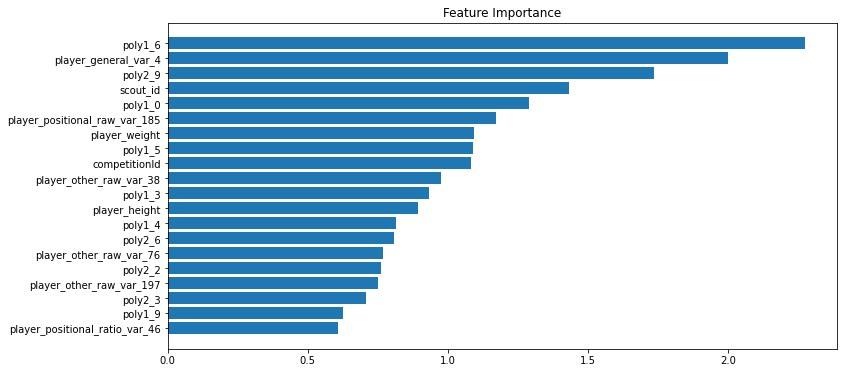

In [150]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(train_df[features].columns)[sorted_idx])
plt.title('Feature Importance')


In [151]:
feature_importance_df =np.array(train_df[features].columns)[sorted_idx]

In [152]:
feature_importance_df.shape

(20,)

In [153]:
min(test_pred),max(test_pred),test_pred.mean()

(7.815344440948389, 9.094589749684424, 8.552666994064499)

In [154]:
new_feat =train_df[['poly1_6','player_general_var_4','poly2_9','scout_id','poly1_0',
            'player_positional_raw_var_185','player_weight','poly1_5',
            'competitionId','player_other_raw_var_38','poly1_3','player_height',
            'poly1_4','poly2_6','player_other_raw_var_76','poly2_2',
            'player_other_raw_var_197','poly2_3','poly1_9','player_positional_ratio_var_46']]

In [155]:
new_feat_test =test_df[['poly1_6','player_general_var_4','poly2_9','scout_id','poly1_0',
            'player_positional_raw_var_185','player_weight','poly1_5',
            'competitionId','player_other_raw_var_38','poly1_3','player_height',
            'poly1_4','poly2_6','player_other_raw_var_76','poly2_2',
            'player_other_raw_var_197','poly2_3','poly1_9','player_positional_ratio_var_46']]

In [156]:
scaler = StandardScaler()
x_new = scaler.fit_transform(new_feat)
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)


In [157]:
from catboost import CatBoostRegressor #, Pool
categorical_features =  np.where(new_feat.dtypes == object )[0]

model = CatBoostRegressor(iterations=5000)
# model.fit(train_df[features], y, cat_features=categorical_features) #You can fix this model on the whole train_df[features] without splitting the features into X_train, y_train, X_test and y_test, see above line code in cell 76
model.fit(X_train, y_train, cat_features=categorical_features)
y_test_pred = model.predict(X_test)
# test_pred_nf = model.predict(new_feat_test)
test_pred_nf = model.predict(test_df[features])

#submission Csv 
ss['rating_num'] = test_pred_nf
ss.to_csv('footballnew_f.csv',index=False)

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[-20:]


Learning rate set to 0.017207
0:	learn: 1.8925747	total: 3.98ms	remaining: 19.9s
1:	learn: 1.8905438	total: 7.24ms	remaining: 18.1s
2:	learn: 1.8880865	total: 10.5ms	remaining: 17.5s
3:	learn: 1.8857961	total: 13.8ms	remaining: 17.2s
4:	learn: 1.8834798	total: 17.5ms	remaining: 17.5s
5:	learn: 1.8813174	total: 21ms	remaining: 17.5s
6:	learn: 1.8791552	total: 24.2ms	remaining: 17.3s
7:	learn: 1.8771107	total: 27.6ms	remaining: 17.3s
8:	learn: 1.8751176	total: 30.9ms	remaining: 17.1s
9:	learn: 1.8731431	total: 34.3ms	remaining: 17.1s
10:	learn: 1.8712206	total: 37.5ms	remaining: 17s
11:	learn: 1.8693619	total: 40.7ms	remaining: 16.9s
12:	learn: 1.8676979	total: 44.2ms	remaining: 17s
13:	learn: 1.8658912	total: 47.5ms	remaining: 16.9s
14:	learn: 1.8639646	total: 50.9ms	remaining: 16.9s
15:	learn: 1.8623967	total: 54.1ms	remaining: 16.9s
16:	learn: 1.8606717	total: 57.6ms	remaining: 16.9s
17:	learn: 1.8590223	total: 60.8ms	remaining: 16.8s
18:	learn: 1.8574685	total: 64.3ms	remaining: 16.8

In [158]:
# print(f1_score(y_test_pred, y_test))
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
print_metrics(y_test, y_test_pred, 28)

Mean Square Error      = 2.150814463674634
Root Mean Square Error = 1.4665655333719778
Mean Absolute Error    = 1.1128012778831327
Median Absolute Error  = 0.8411363401901362
R^2                    = 0.3661403852958335
Adjusted R^2           = 0.3619281752055031


In [159]:
y_test_pred

array([7.32716254, 7.46246698, 6.86630596, ..., 5.76687787, 7.25018907,
       8.78436243])

In [160]:
min(test_pred_nf),max(test_pred_nf),test_pred_nf.mean()

(5.878209208112452, 8.374292936417913, 6.8963340508996085)

# 2nd Model -  LGBM with encoding of catagorical variables.

In [161]:
data2 = new_data.drop('rating_num', axis = 1)
# data2 = data.drop('rating_num', axis = 1)

In [162]:
data2.shape

(29227, 709)

In [163]:
# quality_report(data2)

In [164]:
# Change the datatype of charecter columns as charecter.
data2['scout_id'] = data2['scout_id'].astype(str)
data2['team1_system_id'] = data2['team1_system_id'].astype(str)
data2['team2_system_id'] = data2['team2_system_id'].astype(str)
data2['competitionId'] = data2['competitionId'].astype(str)
data2['player_position_1'] = data2['player_position_1'].astype(str)
data2['player_position_2'] = data2['player_position_2'].astype(str)


In [165]:
cateogry_columns=data2.select_dtypes(include=['object']).columns.tolist()
cateogry_columns

['scout_id',
 'competitionId',
 'player_position_1',
 'player_position_2',
 'team1_system_id',
 'team2_system_id']

In [166]:
# For next part - Encoded the catagorical columns
data_2 = pd.get_dummies(data2,  drop_first=False)

In [167]:
data_2.head()

winner  team  player_height  player_weight  player_general_var_0  \
0       1     0       0.317073           0.48                   0.0   
1      -1     1       0.463415           0.42                   0.0   
2      -1     0       0.682927           0.44                   0.0   
3      -1     1       0.682927           0.58                   0.0   
4       0     0       0.731707           0.70                   0.0   

   player_general_var_2  player_general_var_4  player_positional_raw_var_0  \
0                   0.0              0.114754                          0.0   
1                   0.0              0.081967                          0.0   
2                   0.0              0.065574                          0.0   
3                   0.0              0.000000                          0.0   
4                   0.0              0.262295                          0.0   

   player_positional_raw_var_2  player_defensive_raw_var_4  \
0                          0.0                      0.0000   
1                          0.0                      0.0625   
2                          0.0                      0.1875   
3                          0.0                      0.0000   
4                          0.0                      0.0000   

   player_defensive_raw_var_5  player_other_raw_var_6  \
0                         0.0                0.467550   
1                         0.0                0.436467   
2                         0.0                0.631370   
3                         0.0                0.467550   
4                         0.0                0.467550   

   player_offensive_raw_var_7  player_positional_raw_var_15  \
0                         0.0                           0.0   
1                         0.0                           0.0   
2                         0.0                           0.0   
3                         0.0                           0.0   
4                         0.4                           0.0   

   player_other_raw_var_18  player_other_raw_var_20  \
0                      0.0                      0.0   
1                      0.0                      0.0   
2                      0.0                      0.0   
3                      0.0                      0.0   
4                      0.0                      0.0   

   player_offensive_raw_var_31  player_offensive_raw_var_32  \
0                     0.142857                          0.0   
1                     0.000000                          0.0   
2                     0.071429                          0.0   
3                     0.000000                          0.0   
4                     0.000000                          0.0   

   player_other_raw_var_34  player_other_raw_var_35  player_other_raw_var_37  \
0                 0.090909                      0.0                      0.0   
1                 0.090909                      0.1                      0.0   
2                 0.090909                      0.0                      0.0   
3                 0.000000                      0.0                      0.0   
4                 0.090909                      0.1                      0.0   

   player_other_raw_var_38  player_other_raw_var_39  player_other_raw_var_40  \
0                 0.294118                      0.0                      0.0   
1                 0.000000                      0.0                      0.0   
2                 0.117647                      0.0                      0.0   
3                 0.000000                      0.0                      0.0   
4                 0.000000                      0.0                      0.0   

   player_other_raw_var_41  player_defensive_raw_var_42  \
0                 0.000000                     0.000000   
1                 0.000000                     0.090909   
2                 0.111111                     0.090909   
3                 0.000000                     0.000000   
4                 0.111111                   

In [168]:
#splitting data 
df_train = data_2.iloc[0:20453,:]
df_test = data_2.iloc[20453:,:]
df_train.shape , df_test.shape, data_2.shape

((20453, 827), (8774, 827), (29227, 827))

In [169]:
df_test.head()

winner  team  player_height  player_weight  player_general_var_0  \
20453       0     0       0.317073           0.44                   0.0   
20454       0     0       0.560976           0.60                   0.0   
20455      -1     1       0.195122           0.30                   0.0   
20456      -1     0       0.341463           0.30                   0.0   
20457       1     0       0.585366           0.70                   0.2   

       player_general_var_2  player_general_var_4  \
20453              0.803922              0.114754   
20454              0.000000              0.229508   
20455              0.000000              0.049180   
20456              0.000000              0.073770   
20457              0.000000              0.106557   

       player_positional_raw_var_0  player_positional_raw_var_2  \
20453                     0.166667                          0.0   
20454                     0.000000                          0.0   
20455                     0.000000                          0.0   
20456                     0.000000                          0.0   
20457                     0.000000                          0.0   

       player_defensive_raw_var_4  player_defensive_raw_var_5  \
20453                      0.0625                         0.0   
20454                      0.0625                         0.0   
20455                      0.0000                         0.0   
20456                      0.0000                         0.0   
20457                      0.0000                         0.0   

       player_other_raw_var_6  player_offensive_raw_var_7  \
20453                0.467550                         0.0   
20454                0.287744                         0.0   
20455                0.467550                         0.2   
20456                0.467550                         0.0   
20457                0.359680                         0.0   

       player_positional_raw_var_15  player_other_raw_var_18  \
20453                           0.0                 0.000000   
20454                           0.0                 0.000000   
20455                           0.0                 0.000000   
20456                           0.0                 0.000000   
20457                           0.0                 0.166667   

       player_other_raw_var_20  player_offensive_raw_var_31  \
20453                     0.00                          0.0   
20454                     0.00                          0.0   
20455                     0.00                          0.0   
20456                     0.00                          0.0   
20457                     0.25                          0.0   

       player_offensive_raw_var_32  player_other_raw_var_34  \
20453                          0.0                 0.090909   
20454                          0.0                 0.000000   
20455                          0.0                 0.000000   
20456                          0.0                 0.000000   
20457                          0.0                 0.090909   

       player_other_raw_var_35  player_other_raw_var_37  \
20453                      0.1                      0.0   
20454                      0.0                      0.0   
20455                      0.0                      0.0   
20456                      0.0                      0.0   
20457                      0.1                      0.0   

       player_other_raw_var_38  player_other_raw_var_39  \
20453                 0.000000                      0.0   
20454                 0.000000                      0.0   
20455                 0.000000                      0.0   
20456                 0.058824                      0.0   
20457                 0.000000                      0.0   

       player_other_raw_var_40  player_other_raw_var_41  \
20453                      0.0                 0.333333   
20454                      0.0                 0.111111   
20455                      0.0                

In [170]:
df_train.head()

winner  team  player_height  player_weight  player_general_var_0  \
0       1     0       0.317073           0.48                   0.0   
1      -1     1       0.463415           0.42                   0.0   
2      -1     0       0.682927           0.44                   0.0   
3      -1     1       0.682927           0.58                   0.0   
4       0     0       0.731707           0.70                   0.0   

   player_general_var_2  player_general_var_4  player_positional_raw_var_0  \
0                   0.0              0.114754                          0.0   
1                   0.0              0.081967                          0.0   
2                   0.0              0.065574                          0.0   
3                   0.0              0.000000                          0.0   
4                   0.0              0.262295                          0.0   

   player_positional_raw_var_2  player_defensive_raw_var_4  \
0                          0.0                      0.0000   
1                          0.0                      0.0625   
2                          0.0                      0.1875   
3                          0.0                      0.0000   
4                          0.0                      0.0000   

   player_defensive_raw_var_5  player_other_raw_var_6  \
0                         0.0                0.467550   
1                         0.0                0.436467   
2                         0.0                0.631370   
3                         0.0                0.467550   
4                         0.0                0.467550   

   player_offensive_raw_var_7  player_positional_raw_var_15  \
0                         0.0                           0.0   
1                         0.0                           0.0   
2                         0.0                           0.0   
3                         0.0                           0.0   
4                         0.4                           0.0   

   player_other_raw_var_18  player_other_raw_var_20  \
0                      0.0                      0.0   
1                      0.0                      0.0   
2                      0.0                      0.0   
3                      0.0                      0.0   
4                      0.0                      0.0   

   player_offensive_raw_var_31  player_offensive_raw_var_32  \
0                     0.142857                          0.0   
1                     0.000000                          0.0   
2                     0.071429                          0.0   
3                     0.000000                          0.0   
4                     0.000000                          0.0   

   player_other_raw_var_34  player_other_raw_var_35  player_other_raw_var_37  \
0                 0.090909                      0.0                      0.0   
1                 0.090909                      0.1                      0.0   
2                 0.090909                      0.0                      0.0   
3                 0.000000                      0.0                      0.0   
4                 0.090909                      0.1                      0.0   

   player_other_raw_var_38  player_other_raw_var_39  player_other_raw_var_40  \
0                 0.294118                      0.0                      0.0   
1                 0.000000                      0.0                      0.0   
2                 0.117647                      0.0                      0.0   
3                 0.000000                      0.0                      0.0   
4                 0.000000                      0.0                      0.0   

   player_other_raw_var_41  player_defensive_raw_var_42  \
0                 0.000000                     0.000000   
1                 0.000000                     0.090909   
2                 0.111111                     0.090909   
3                 0.000000                     0.000000   
4                 0.111111                   

In [171]:
X = df_train
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
# train_df.dtypes

In [173]:
# pip install lightgbm

In [174]:
# This is my custom function for LGBM , i used it to get the best parameters

def lgbm_reg(x_train,y_train,x_test,n=10,cv=10,
                learning_rate=[0.01,0.05,0.1,0.3,0.5],
                max_depth= [2,4,6,8,10,12],
                num_leaves= [25,50,100,200],
                reg_lambda=[0.8], 
                reg_alpha=[0.8],
                n_estimators=[50,100,200,500,1000],
                subsample_freq=[1,2,3,4]):

    from sklearn.model_selection import RandomizedSearchCV

    import warnings

    import lightgbm as lgbm

    warnings.filterwarnings('ignore')

    from sklearn.pipeline import Pipeline,FeatureUnion
    from sklearn.base import BaseEstimator, TransformerMixin
    
    def report(results, n_top=3):
        for i in range(1, n_top + 1):
            candidates = np.flatnonzero(results['rank_test_score'] == i)
            for candidate in candidates:
                print("Model with rank: {0}".format(i))
                print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                      results['mean_test_score'][candidate],
                      results['std_test_score'][candidate]))
                print("Parameters: {0}".format(results['params'][candidate]))
                print("")    
    
    
    lgbm_params = {  
                "learning_rate":learning_rate,
                "max_depth":max_depth,
                "num_leaves":num_leaves,
                "n_estimators":n_estimators,
                "reg_lambda":reg_lambda,
                "reg_alpha":reg_alpha,
                "subsample_freq":subsample_freq,
                #"metric":'rmse'
             }
    
    
    lgbm=lgbm.LGBMRegressor()
    n_iter=n

    random_search=RandomizedSearchCV(lgbm,n_jobs=-1,cv=cv,n_iter=n,scoring='r2',
                                 param_distributions=lgbm_params)
    random_search.fit(X_train,y_train)
    # random_search.fit(train_df,y) #this is to train without splitting into X_test and X_train y_test and y_train data 
    random_search.fit 
    report(random_search.cv_results_,5)
    y_test_pred = random_search.predict(X_test)
    test_pred= random_search.predict(df_test)
    test_pred=test_pred.reshape(len(test_pred),1)
    def print_metrics(y_true, y_predicted, n_parameters):
        ## First compute R^2 and the adjusted R^2
        r2 = sklm.r2_score(y_true, y_predicted)
        r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)

        ## Print the usual metrics and the R^2 values
        print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
        print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
        print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
        print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
        print('R^2                    = ' + str(r2))
        print('Adjusted R^2           = ' + str(r2_adj))
    print_metrics(y_test, y_test_pred, 28)
    return(test_pred)    

In [175]:
# Replace with best parameters combination and predict 
import time
start_time = time.time()
lgbm_pred = lgbm_reg(X_train,y_train,
                    df_test,cv=3,n=1,
                   n_estimators=[1000],learning_rate=[0.05],
                   subsample_freq=[2],num_leaves=[100],
                     max_depth=[8],
                    )

ss['rating_num'] = lgbm_pred
ss.to_csv('football1.csv',index=False)
print("--- %s seconds ---" % (time.time() - start_time))


Model with rank: 1
Mean validation score: 0.362 (std: 0.00827)
Parameters: {'subsample_freq': 2, 'reg_lambda': 0.8, 'reg_alpha': 0.8, 'num_leaves': 100, 'n_estimators': 1000, 'max_depth': 8, 'learning_rate': 0.05}

Mean Square Error      = 1.9052567009703518
Root Mean Square Error = 1.3803103640016443
Mean Absolute Error    = 0.9877632444558531
Median Absolute Error  = 0.6876086524208969
R^2                    = 0.438507923958108
Adjusted R^2           = 0.43477662047468907
--- 244.61674880981445 seconds ---


In [177]:
min(lgbm_pred),max(lgbm_pred),lgbm_pred.mean()

(array([5.93285073]), array([9.01488521]), 7.014522902248389)

In [178]:
lgbm_pred[lgbm_pred>10]=10
min(lgbm_pred),max(lgbm_pred),lgbm_pred.mean()

(array([5.93285073]), array([9.01488521]), 7.014522902248389)

# TAKING AVERAGE OF BOTH MODELS Without FEATURES IMPORTANCE

In [179]:
test_pred

array([8.38813452, 8.5315094 , 8.61418131, ..., 8.73404995, 8.44462137,
       8.63276334])

In [180]:
lgbm_pred

array([[6.5329574 ],
       [6.82961134],
       [7.51588168],
       ...,
       [7.18148667],
       [6.81503567],
       [6.7882977 ]])

In [181]:
ss['rating_num'] = test_pred.reshape(8774,1)*0.5 + lgbm_pred*0.5
min(ss['rating_num']),max(ss['rating_num']),ss['rating_num'].mean()

(6.968096225093671, 8.99582506924095, 7.78359494815643)

In [182]:
#final submission of both catboost and lgbm prediction without feature engineering
ss.to_csv('football_both_sub.csv',index=False)

# Explore Rating Distributions

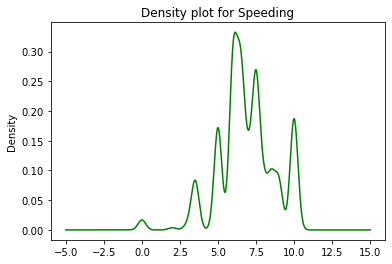

6.0     3654
6.5     3247
7.5     3206
10.0    2442
5.0     2244
7.0     1248
3.5     1077
8.5     1062
9.0     1023
8.0      873
0.0      218
3.0      110
2.0       49
Name: rating_num, dtype: int64

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv("train.csv")

train.rating_num.plot.density(color='green')
plt.title('Density plot for Speeding')
plt.show()

train['rating_num'].value_counts()

In [184]:
# Draw a scatter plot
# train.plot.scatter(x = 'rating_num', y = 'team', s = 100);



####  Even after taking the average of both the models the minimum is still 6.9 , which should be closer to zero. I guess if I tried with dropping few rows of training data with Rating 10 and it could as well give a better score but didn’t do that, which can be used to proves that the result is getting biased towards higher rating. Eventually I tried to reduce that biasness in the rating columns by subtracting the rating with – 0.95 (which Is very close to zero) and gradually changed it with different section. Rating between 5 to 7.5 are treated more finely due to presence of higher number of predictions. Just like parameter tuning had to perform plenty of trial and errors to get what is working best.

In [202]:
ss['rating_num'] = (test_pred.reshape(8774,1)*0.5 + lgbm_pred*0.5)
ss['rating_num'][ss['rating_num']<2]= ss['rating_num'] -0.95
ss['rating_num'][(ss['rating_num']<4) & (ss['rating_num']>=2)]= ss['rating_num']-0.93
ss['rating_num'][(ss['rating_num']<5) & (ss['rating_num']>=4)]= ss['rating_num']-0.89
ss['rating_num'][(ss['rating_num']<5.25) & (ss['rating_num']>=5)]= ss['rating_num']-0.85
ss['rating_num'][(ss['rating_num']<5.5) & (ss['rating_num']>=5.25)]= ss['rating_num']-0.67
ss['rating_num'][(ss['rating_num']<5.75) & (ss['rating_num']>=5.5)]= ss['rating_num']-0.55
ss['rating_num'][(ss['rating_num']<6) & (ss['rating_num']>=5.75)]= ss['rating_num']-0.42
ss['rating_num'][(ss['rating_num']<6.25) & (ss['rating_num']>=6)]= ss['rating_num']-0.41
ss['rating_num'][(ss['rating_num']<6.5) & (ss['rating_num']>=6.25)]= ss['rating_num']-0.52
ss['rating_num'][(ss['rating_num']<6.75) & (ss['rating_num']>=6.5)]= ss['rating_num']-0.46
ss['rating_num'][(ss['rating_num']<7) & (ss['rating_num']>=6.75)]= ss['rating_num']-0.36
ss['rating_num'][(ss['rating_num']<7.25) & (ss['rating_num']>=7)]= ss['rating_num']-0.40
ss['rating_num'][(ss['rating_num']<7.5) & (ss['rating_num']>=7.25)]= ss['rating_num']-0.54
ss['rating_num'][(ss['rating_num']<8) & (ss['rating_num']>=7.5)]= ss['rating_num']-0.15
ss['rating_num'][(ss['rating_num']<8.5) & (ss['rating_num']>=8)]= ss['rating_num']-0.10
ss['rating_num'][(ss['rating_num']<9) & (ss['rating_num']>=8.5)]= ss['rating_num']-0.20
ss['rating_num'][(ss['rating_num']<11) & (ss['rating_num']>=9)]= ss['rating_num']-0.12


In [203]:
# Final submission with tunning the rating_num
ss.to_csv('football_final_sub.csv',index=False)

In [187]:
df_train.columns

Index(['winner', 'team', 'player_height', 'player_weight',
       'player_general_var_0', 'player_general_var_2', 'player_general_var_4',
       'player_positional_raw_var_0', 'player_positional_raw_var_2',
       'player_defensive_raw_var_4',
       ...
       'team2_system_id_23.0', 'team2_system_id_26.0', 'team2_system_id_27.0',
       'team2_system_id_28.0', 'team2_system_id_4.0', 'team2_system_id_5.0',
       'team2_system_id_6.0', 'team2_system_id_7.0', 'team2_system_id_8.0',
       'team2_system_id_9.0'],
      dtype='object', length=827)

Text(0.5, 1.0, 'Feature Importance')

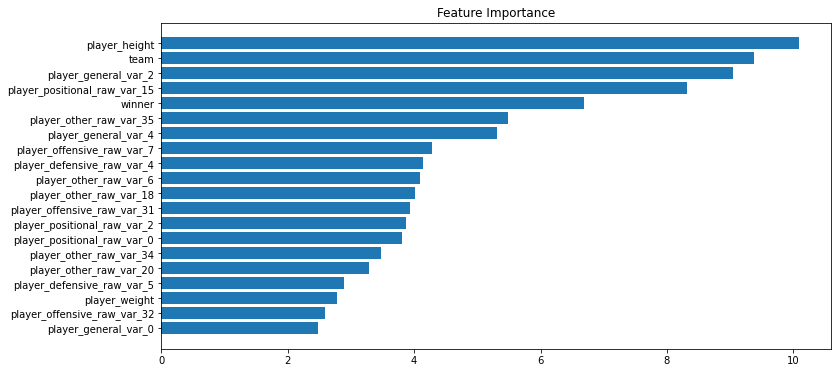

In [188]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(df_train.columns)[sorted_idx])
plt.title('Feature Importance')


In [189]:
new_fea = df_train[['player_height','team','player_general_var_2','player_positional_raw_var_15','winner','player_other_raw_var_35','player_general_var_4',
                    'player_other_raw_var_6','player_offensive_raw_var_7','player_defensive_raw_var_4','player_other_raw_var_18','player_offensive_raw_var_31',
                    'player_positional_raw_var_2','player_positional_raw_var_0','player_other_raw_var_34','player_other_raw_var_20','player_defensive_raw_var_5',
                    'player_weight','player_general_var_0','player_offensive_raw_var_32']]

In [190]:
new_fea_test = df_test[['player_height','team','player_general_var_2','player_positional_raw_var_15','winner','player_other_raw_var_35','player_general_var_4',
                    'player_other_raw_var_6','player_offensive_raw_var_7','player_defensive_raw_var_4','player_other_raw_var_18','player_offensive_raw_var_31',
                    'player_positional_raw_var_2','player_positional_raw_var_0','player_other_raw_var_34','player_other_raw_var_20','player_defensive_raw_var_5',
                    'player_weight','player_general_var_0','player_offensive_raw_var_32']]

In [191]:
scaler = StandardScaler()
X_new = scaler.fit_transform(new_fea)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [192]:
# This is my custom function for LGBM , i used it to get the best parameters

def lgbm_reg(x_train,y_train,x_test,n=10,cv=10,
                learning_rate=[0.01,0.05,0.1,0.3,0.5],
                max_depth= [2,4,6,8,10,12],
                num_leaves= [25,50,100,200],
                reg_lambda=[0.8], 
                reg_alpha=[0.8],
                n_estimators=[50,100,200,500,1000],
                subsample_freq=[1,2,3,4]):

    from sklearn.model_selection import RandomizedSearchCV

    import warnings

    import lightgbm as lgbm

    warnings.filterwarnings('ignore')

    from sklearn.pipeline import Pipeline,FeatureUnion
    from sklearn.base import BaseEstimator, TransformerMixin
    
    def report(results, n_top=3):
        for i in range(1, n_top + 1):
            candidates = np.flatnonzero(results['rank_test_score'] == i)
            for candidate in candidates:
                print("Model with rank: {0}".format(i))
                print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                      results['mean_test_score'][candidate],
                      results['std_test_score'][candidate]))
                print("Parameters: {0}".format(results['params'][candidate]))
                print("")    
    
    
    lgbm_params = {  
                "learning_rate":learning_rate,
                "max_depth":max_depth,
                "num_leaves":num_leaves,
                "n_estimators":n_estimators,
                "reg_lambda":reg_lambda,
                "reg_alpha":reg_alpha,
                "subsample_freq":subsample_freq,
                #"metric":'rmse'
             }
    
    
    lgbm=lgbm.LGBMRegressor()
    n_iter=n

    random_search=RandomizedSearchCV(lgbm,n_jobs=-1,cv=cv,n_iter=n,scoring='r2',
                                 param_distributions=lgbm_params)
    random_search.fit(X_train,y_train)
    # random_search.fit(train_df,y) #this is to train without splitting into X_test and X_train y_test and y_train data 
    random_search.fit 
    report(random_search.cv_results_,5)
    test_pred_y = random_search.predict(X_test)
    test_pred= random_search.predict(new_fea_test)
    test_pred=test_pred.reshape(len(test_pred),1)
    # print(f1_score(y_test_pred, y_test))
    def print_metrics(y_true, y_predicted, n_parameters):
        ## First compute R^2 and the adjusted R^2
        r2 = sklm.r2_score(y_true, y_predicted)
        r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)

        ## Print the usual metrics and the R^2 values
        print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
        print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
        print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
        print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
        print('R^2                    = ' + str(r2))
        print('Adjusted R^2           = ' + str(r2_adj))
    print_metrics(y_test, test_pred_y, 28)
    # print(test_pred_y)
    return(test_pred)    

In [193]:
# Replace with best parameters combination and predict 
import time
start_time = time.time()
lgbm_pred_nf = lgbm_reg(X_train,y_train,
                    new_fea_test ,cv=3,n=1,
                   n_estimators=[1000],learning_rate=[0.05],
                   subsample_freq=[2],num_leaves=[100],
                     max_depth=[8],
                    )

ss['rating_num'] = lgbm_pred_nf
ss.to_csv('football_new_feat_Llgbm.csv',index=False)
print("--- %s seconds ---" % (time.time() - start_time))


Model with rank: 1
Mean validation score: 0.239 (std: 0.00711)
Parameters: {'subsample_freq': 2, 'reg_lambda': 0.8, 'reg_alpha': 0.8, 'num_leaves': 100, 'n_estimators': 1000, 'max_depth': 8, 'learning_rate': 0.05}

Mean Square Error      = 2.308676895326489
Root Mean Square Error = 1.5194330835303307
Mean Absolute Error    = 1.1258217360692668
Median Absolute Error  = 0.8169279634961626
R^2                    = 0.3196172556660687
Adjusted R^2           = 0.3150958837495006
--- 7.815528869628906 seconds ---


In [194]:
min(lgbm_pred_nf),max(lgbm_pred_nf),lgbm_pred_nf.mean()

(array([4.1440262]), array([8.0483687]), 6.365803162738208)

In [195]:
lgbm_pred_nf[lgbm_pred_nf>10]=10
min(lgbm_pred_nf),max(lgbm_pred_nf),lgbm_pred_nf.mean()

(array([4.1440262]), array([8.0483687]), 6.365803162738208)

In [196]:
test_pred_nf, lgbm_pred_nf

(array([8.24664039, 6.7532426 , 7.25108528, ..., 6.51127579, 6.45980384,
        6.42073879]),
 array([[6.35919462],
        [6.47452628],
        [6.01370065],
        ...,
        [5.40048289],
        [7.29025381],
        [6.60546286]]))

In [197]:
ss['rating_num'] = test_pred_nf.reshape(8774,1)*0.5 + lgbm_pred_nf*0.5
min(ss['rating_num']),max(ss['rating_num']),ss['rating_num'].mean()

(5.393171020738812, 7.913845234351106, 6.631068606818901)

In [198]:
# Final submision with using features importance
ss.to_csv('football_both_new_features_selected_sub.csv',index=False)

####  Even after taking the average of both the models the minimum is still 5.3, which should be closer to zero. Trying to reduce possible biasness in the rating columns by subtracting the rating with – 0.99 (which Is very close to zero) and gradually changed it with different section. Rating between 5 to 7.5 are treated more finely due to presence of higher number of predictions. Just like parameter tuning had to perform plenty of trial and errors to get what is working best doesn’t really affect the model with feature Importance. 

In [199]:
ss['rating_num'] = (test_pred_nf.reshape(8774,1)*0.5 + lgbm_pred_nf*0.5)
ss['rating_num'][ss['rating_num']<2]= ss['rating_num'] -0.99
ss['rating_num'][(ss['rating_num']<4) & (ss['rating_num']>=2)]= ss['rating_num']-0.94
ss['rating_num'][(ss['rating_num']<5) & (ss['rating_num']>=4)]= ss['rating_num']-0.89
ss['rating_num'][(ss['rating_num']<5.25) & (ss['rating_num']>=5)]= ss['rating_num']-0.85
ss['rating_num'][(ss['rating_num']<5.5) & (ss['rating_num']>=5.25)]= ss['rating_num']-0.67
ss['rating_num'][(ss['rating_num']<5.75) & (ss['rating_num']>=5.5)]= ss['rating_num']-0.55
ss['rating_num'][(ss['rating_num']<6) & (ss['rating_num']>=5.75)]= ss['rating_num']-0.42
ss['rating_num'][(ss['rating_num']<6.25) & (ss['rating_num']>=6)]= ss['rating_num']-0.41
ss['rating_num'][(ss['rating_num']<6.5) & (ss['rating_num']>=6.25)]= ss['rating_num']-0.52
ss['rating_num'][(ss['rating_num']<6.75) & (ss['rating_num']>=6.5)]= ss['rating_num']-0.46
ss['rating_num'][(ss['rating_num']<7) & (ss['rating_num']>=6.75)]= ss['rating_num']-0.36
ss['rating_num'][(ss['rating_num']<7.25) & (ss['rating_num']>=7)]= ss['rating_num']-0.40
ss['rating_num'][(ss['rating_num']<7.5) & (ss['rating_num']>=7.25)]= ss['rating_num']-0.54
ss['rating_num'][(ss['rating_num']<8) & (ss['rating_num']>=7.5)]= ss['rating_num']-0.15
ss['rating_num'][(ss['rating_num']<8.5) & (ss['rating_num']>=8)]= ss['rating_num']-0.10
ss['rating_num'][(ss['rating_num']<9) & (ss['rating_num']>=8.5)]= ss['rating_num']-0.20
ss['rating_num'][(ss['rating_num']<11) & (ss['rating_num']>=9)]= ss['rating_num']-0.12


In [200]:
#final submision of using model with features importance and hyper tunning
ss.to_csv('football_final_sub_2.csv',index=False)

In [201]:
# ss['rating_num']